# DataPrep_maison

## Import des données


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns',0)

"""
dir=r'raw_data\From_Clement'
df=pd.DataFrame()
for file in os.listdir(dir):
    if 'iris' in file:
        path=os.path.join(dir,file)
        print(path)
        df=pd.concat([df,pd.read_csv(path,sep=';',low_memory=False)],ignore_index=True)
df.info()
"""

df=pd.read_parquet(r'raw_data\From_Clement\ventes-metropole.parquet')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4869119 entries, 0 to 4869118
Data columns (total 59 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   idannonce                object 
 1   type_annonceur           object 
 2   typedebien               object 
 3   typedetransaction        object 
 4   etage                    int64  
 5   surface                  int64  
 6   surface_terrain          float64
 7   nb_pieces                int64  
 8   prix_bien                int64  
 9   prix_maison              float64
 10  prix_terrain             float64
 11  mensualiteFinance        int64  
 12  balcon                   int64  
 13  eau                      int64  
 14  bain                     int64  
 15  dpeL                     object 
 16  dpeC                     float64
 17  mapCoordonneesLatitude   float64
 18  mapCoordonneesLongitude  float64
 19  annonce_exclusive        object 
 20  nb_etages                float64
 21  parking      

In [3]:
# Remplacer par import region parisienne plus haut
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dir = "../../data/immo_vis/"
region = "auvergne-rhone-alpes"
prefix= "ventes-"
extension = ".parquet"
input_file = dir + prefix + region + extension
df= pd.read_parquet(input_file)
"""
nb_rows= df.shape[0]
nb_cols= df.shape[1]
print (df.shape)
display(df.head(10))

(4869119, 59)


,idannonce,type_annonceur,typedebien,typedetransaction,etage,surface,surface_terrain,nb_pieces,prix_bien,prix_maison,prix_terrain,mensualiteFinance,balcon,eau,bain,dpeL,dpeC,mapCoordonneesLatitude,mapCoordonneesLongitude,annonce_exclusive,nb_etages,parking,places_parking,cave,exposition,ges_class,annee_construction,nb_toilettes,nb_terraces,videophone,porte_digicode,surface_balcon,ascenseur,nb_logements_copro,charges_copro,chauffage_energie,chauffage_systeme,chauffage_mode,categorie_annonceur,logement_neuf,duree_int,typedebien_lite,date,INSEE_COM,IRIS,CODE_IRIS,TYP_IRIS_x,TYP_IRIS_y,GRD_QUART,UU2010,REG,DEP,loyer_m2_median_n6,nb_log_n6,taux_rendement_n6,loyer_m2_median_n7,nb_log_n7,taux_rendement_n7,prix_m2_vente
0,entities-1037638-4560933,pr,m,v,0,79,470.00,4,241000,NaN,NaN,0,0,0,1,0,NaN,46.25,5.23,0,1.00,None,NaN,None,0,None,NaN,NaN,NaN,None,None,NaN,None,NaN,NaN,None,None,None,cm,o,8.00,m,2025-02,1451,101,14510101,H,H,145101,1501,84,1,9.81,3.00,0.04,10.42,9.00,0.04,3050.63
1,immo-facile-57743459,pr,a,v,0,65,650.00,2,136000,NaN,NaN,0,0,0,0,D,194.00,46.26,5.23,Oui,NaN,None,3.00,False,0,D,1940.00,1.00,NaN,None,False,NaN,False,4.00,10.00,Fioul,Radiateur,Individuel,a,n,NaN,a,2025-02,1451,101,14510101,H,H,145101,1501,84,1,10.65,3.00,0.06,10.50,11.00,0.06,2092.31
2,entities-1037666-4560741,pr,m,v,0,114,450.00,5,260900,NaN,NaN,0,0,0,1,0,NaN,46.29,5.67,0,NaN,None,NaN,None,0,None,NaN,NaN,NaN,None,None,NaN,None,NaN,NaN,None,None,None,cm,o,8.00,m,2025-02,1014,0,10140000,Z,Z,101400,1401,84,1,11.34,2.00,0.06,11.34,2.00,0.06,2288.60
3,immo-facile-57762298,pr,m,v,0,148,1500.00,7,286000,NaN,NaN,0,0,0,0,D,180.00,46.26,5.23,Oui,NaN,None,NaN,None,0,D,1948.00,NaN,NaN,None,None,NaN,None,5.00,120.00,None,None,None,a,n,NaN,m,2025-02,1451,101,14510101,H,H,145101,1501,84,1,NaN,NaN,NaN,7.27,2.00,0.04,1932.43
4,immo-facile-57762759,pr,m,v,0,213,2251.00,8,435000,NaN,NaN,0,0,0,0,D,180.00,46.26,5.23,Oui,NaN,None,NaN,None,0,D,NaN,NaN,NaN,None,None,NaN,None,NaN,NaN,None,None,None,a,n,8.00,m,2025-02,1451,101,14510101,H,H,145101,1501,84,1,NaN,NaN,NaN,NaN,NaN,NaN,2042.25
5,hektor-369_EXPERTIMO22-195047,pr,m,v,0,120,670.00,4,497000,NaN,NaN,0,0,1,0,G,460.00,46.21,5.96,Non,2.00,None,2.00,None,Sud-Ouest,G,1970.00,1.00,NaN,None,None,NaN,None,NaN,NaN,Fioul,Radiateur,Individuel,m,n,8.00,m,2025-02,1360,0,13600000,Z,Z,136000,1000,84,1,17.43,1.00,0.05,17.43,1.00,0.05,4141.67
6,ubiflow-neuf-458508740,pr,m,v,0,143,600.00,5,790000,NaN,NaN,0,0,0,0,A,NaN,46.21,5.95,0,NaN,None,NaN,None,0,A,NaN,NaN,NaN,None,None,NaN,None,NaN,NaN,None,None,None,cm,o,NaN,m,2025-02,1360,0,13600000,Z,Z,136000,1000,84,1,15.62,3.00,0.03,15.62,3.00,0.03,5524.48
7,ag440414-458481071,pr,m,v,0,120,670.00,4,485000,NaN,NaN,0,1,1,0,G,364.00,46.22,5.94,Oui,3.00,None,7.00,True,Sud,G,NaN,1.00,NaN,None,False,NaN,None,NaN,NaN,Fioul,None,Individuel,m,n,NaN,m,2025-02,1360,0,13600000,Z,Z,136000,1000,84,1,17.43,1.00,0.05,17.43,1.00,0.05,4041.67
8,hektor-369_EXPERTIMO22-191576,pr,a,v,1,72,NaN,3,369000,NaN,NaN,0,0,0,1,C,120.00,46.19,5.91,Non,3.00,None,2.00,True,Sud-Est,D,2010.00,1.00,1.00,None,None,NaN,None,45.00,1380.00,Gaz,Sol,Individuel,m,n,NaN,a,2025-02,1288,0,12880000,Z,Z,128800,1000,84,1,16.12,16.00,0.04,16.12,16.00,0.04,5125.00
9,ag340369-457035236,pr,a,v,2,128,NaN,5,440000,NaN,NaN,0,1,1,1,E,291.00,46.19,5.92,Non,3.00,None,1.00,True,Sud,B,NaN,2.00,NaN,None,None,NaN,None,72.00,1920.00,Électrique,None,None,m,n,NaN,a,2025-02,1288,0,12880000,Z,Z,128800,1000,84,1,15.43,3.00,0.05,15.43,3.00,0.05,3437.50


In [4]:
for i in df.columns:
    print(f'les modalité de {i} sont : ',(df[i].nunique()))

les modalité de idannonce sont :  4869119
les modalité de type_annonceur sont :  2
les modalité de typedebien sont :  7
les modalité de typedetransaction sont :  3
les modalité de etage sont :  121
les modalité de surface sont :  1002
les modalité de surface_terrain sont :  37555
les modalité de nb_pieces sont :  50
les modalité de prix_bien sont :  169617
les modalité de prix_maison sont :  11289
les modalité de prix_terrain sont :  4028
les modalité de mensualiteFinance sont :  4406
les modalité de balcon sont :  48
les modalité de eau sont :  59
les modalité de bain sont :  60
les modalité de dpeL sont :  24
les modalité de dpeC sont :  11005
les modalité de mapCoordonneesLatitude sont :  738483
les modalité de mapCoordonneesLongitude sont :  976492
les modalité de annonce_exclusive sont :  3
les modalité de nb_etages sont :  129
les modalité de parking sont :  2
les modalité de places_parking sont :  258
les modalité de cave sont :  2
les modalité de exposition sont :  599
les moda

In [5]:
#afficher les modalité de "type_de_bien"
df['typedebien'].value_counts()

typedebien
m                     2690554
a                     2012384
mn                      85388
an                      80339
l                         406
Maison/Villa neuve         24
h                          24
Name: count, dtype: int64

In [6]:
#vérifier que pour an,mn correspoinde bien a "logement_neuf"=o
display(df[df['typedebien'].isin(['mn','an','Maison/Villa neuve'])]['logement_neuf'].value_counts())

print("les types dans 'mn','an','Maison/Villa neuve' où on a logement_neuf=='n' :")
df[(df['typedebien'].isin(['mn','an','Maison/Villa neuve'])) & (df['logement_neuf']=="n")]['typedebien'].unique()
#les 540 logement_neuf='n' ont un 'typebien'='an'

logement_neuf
o    86991
n      540
Name: count, dtype: int64

les types dans 'mn','an','Maison/Villa neuve' où on a logement_neuf=='n' :


array(['an'], dtype=object)

In [7]:
#vérifier que pour a,m correspoinde bien a "logement_neuf"=n
display(df[df['typedebien'].isin(['a','m'])]['logement_neuf'].value_counts())

print("les types dans 'a','m' où on a logement_neuf=='o' :")
df[(df['typedebien'].isin(['a','m'])) & (df['logement_neuf']=="o")]['typedebien'].value_counts()


#Ce n'est pas le cas. Donc on considère que a

logement_neuf
n    4276361
o     383708
Name: count, dtype: int64

les types dans 'a','m' où on a logement_neuf=='o' :


typedebien
m    330335
a     53373
Name: count, dtype: int64

In [8]:
df.columns

Index(['idannonce', 'type_annonceur', 'typedebien', 'typedetransaction',
       'etage', 'surface', 'surface_terrain', 'nb_pieces', 'prix_bien',
       'prix_maison', 'prix_terrain', 'mensualiteFinance', 'balcon', 'eau',
       'bain', 'dpeL', 'dpeC', 'mapCoordonneesLatitude',
       'mapCoordonneesLongitude', 'annonce_exclusive', 'nb_etages', 'parking',
       'places_parking', 'cave', 'exposition', 'ges_class',
       'annee_construction', 'nb_toilettes', 'nb_terraces', 'videophone',
       'porte_digicode', 'surface_balcon', 'ascenseur', 'nb_logements_copro',
       'charges_copro', 'chauffage_energie', 'chauffage_systeme',
       'chauffage_mode', 'categorie_annonceur', 'logement_neuf', 'duree_int',
       'typedebien_lite', 'date', 'INSEE_COM', 'IRIS', 'CODE_IRIS',
       'TYP_IRIS_x', 'TYP_IRIS_y', 'GRD_QUART', 'UU2010', 'REG', 'DEP',
       'loyer_m2_median_n6', 'nb_log_n6', 'taux_rendement_n6',
       'loyer_m2_median_n7', 'nb_log_n7', 'taux_rendement_n7',
       'prix_m2_vente

## Récupérer les maisons depuis le parquet global, et garder les colonnes pertinentes 

In [9]:
#Récupérer les maisons
df=df[df['typedebien'].isin(['mn','m','Maison/Villa neuve'])]

#rendre index=idannonce pour retrouver la ligne initiale
df.set_index('idannonce',drop=True,inplace=True)

#ajouter une colonne qui correspond à neuf ou pas en fonction de mn
df['neuf_from_type']=df['typedebien'].isin(['mn','Maison/Villa neuve']).astype('int')

#supprimer les colonnes non pertinentes pour les maisons
df.drop(columns=['type_annonceur', 'typedebien', 'typedetransaction',
       'prix_maison', 'prix_terrain', 'mensualiteFinance', 'balcon', 
       'nb_etages', 'parking', 'eau', 'etage', 
       'dpeC', #pas d'information supplémentaire sur dpeC par rapport à dpeL
       'chauffage_mode', #pas utile pour les maisons
       'places_parking', 'cave', 'nb_terraces', 'videophone',
       'porte_digicode', 'surface_balcon', 'ascenseur', 'nb_logements_copro',
       'charges_copro', 'categorie_annonceur', 'duree_int',
       'typedebien_lite', 'date', 'INSEE_COM', 'IRIS', 
       'TYP_IRIS_x', 'TYP_IRIS_y', 'GRD_QUART', 'UU2010', 
       'loyer_m2_median_n6', 'nb_log_n6', 'taux_rendement_n6',
       'loyer_m2_median_n7', 'nb_log_n7', 'taux_rendement_n7'],
       inplace=True)


#encodage de la colonne 'logement_neuf'
df['logement_neuf'].replace(['o','n'],[1,0],inplace=True)



In [10]:
(df['prix_m2_vente']*df['surface']-df['prix_bien']).describe()

count   2775966.00
mean          0.00
std           0.41
min         -16.77
25%          -0.25
50%           0.00
75%           0.25
max           8.00
dtype: float64

In [11]:
df

,surface,surface_terrain,nb_pieces,prix_bien,bain,dpeL,mapCoordonneesLatitude,mapCoordonneesLongitude,annonce_exclusive,exposition,ges_class,annee_construction,nb_toilettes,chauffage_energie,chauffage_systeme,logement_neuf,CODE_IRIS,REG,DEP,prix_m2_vente,neuf_from_type
idannonce,,,,,,,,,,,,,,,,,,,,,
entities-1037638-4560933,79,470.00,4,241000,1,0,46.25,5.23,0,0,None,NaN,NaN,None,None,1.00,14510101,84,1,3050.63,0
entities-1037666-4560741,114,450.00,5,260900,1,0,46.29,5.67,0,0,None,NaN,NaN,None,None,1.00,10140000,84,1,2288.60,0
immo-facile-57762298,148,1500.00,7,286000,0,D,46.26,5.23,Oui,0,D,1948.00,NaN,None,None,0.00,14510101,84,1,1932.43,0
immo-facile-57762759,213,2251.00,8,435000,0,D,46.26,5.23,Oui,0,D,NaN,NaN,None,None,0.00,14510101,84,1,2042.25,0
hektor-369_EXPERTIMO22-195047,120,670.00,4,497000,0,G,46.21,5.96,Non,Sud-Ouest,G,1970.00,1.00,Fioul,Radiateur,0.00,13600000,84,1,4141.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143446525,105,NaN,4,160000,1,F,44.31,4.95,0,0,None,NaN,NaN,None,None,0.00,841500000,93,84,1523.81,0
143637437,110,NaN,5,219300,1,0,43.95,4.84,0,0,None,NaN,NaN,None,None,0.00,840070115,93,84,1993.64,0
142647795,440,NaN,12,775000,2,0,43.95,4.80,0,0,None,NaN,NaN,None,None,0.00,840070109,93,84,1761.36,0


In [12]:
# #  houses and flats
# print (df['typedebien'].value_counts()) 
# print (df['typedebien'].value_counts(normalize=True)*100) 

# # set charges_copro = 0 for houses
# mask = (df['typedebien'] == "m") | (df['typedebien'] == "mn")
# df.loc[mask,"charges_copro"] = 0

# # set surface_terrain = 0 for flats
# mask = (df['typedebien'] == "a") | (df['typedebien'] == "an")
# df.loc[mask,'surface_terrain'] = 0


In [13]:
# #  process typedebien an & mn (neuf ?)
# result = df [df['typedebien'] == "an"]
# print (f"appartements neufs {result.logement_neuf.value_counts()}")

# result = df [df['typedebien'] == "mn"]
# print (f"maisons neuves {result.logement_neuf.value_counts()}")

# df.loc[df['typedebien'] == "an",'typedebien'] ="a"
# df.loc[df['typedebien'] == "mn",'typedebien'] ="m"

# print (f"maisons neuves {result.logement_neuf.value_counts()}")
# print (f"appartements neufs {result.logement_neuf.value_counts()}")

# #  to be processed 
# print (df['typedebien'].unique()) 

# result = df [df['typedebien'] == "Maison/Villa neuve"]
# print (f"maisons neuves {result.logement_neuf.value_counts()}")

In [14]:
# Visualisation: Heatmap des valeurs manquantes ( too greedy)
# missing_values = df.isna().sum()
# missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
# full_columns = df.columns[ df.isna().any() == False ]
# print (nb_cols)
# print(f"columns without Nan values {full_columns.size} / {nb_cols}" )

# plt.figure(figsize=(10, 8))
# sns.heatmap(df[missing_values.index].isna(), 
#             cbar=False,
#             yticklabels=False)
# plt.title("Carte des valeurs manquantes dans le dataset", fontsize=14)
# plt.xlabel("Colonnes")
# plt.ylabel("Observations")
# plt.tight_layout()
# plt.grid(True)
# plt.show()


## Traitement des colonnes  

### Colonnes numériques : NA et valeurs abérrantes


 nb_rows 4869119 nb_cols 59


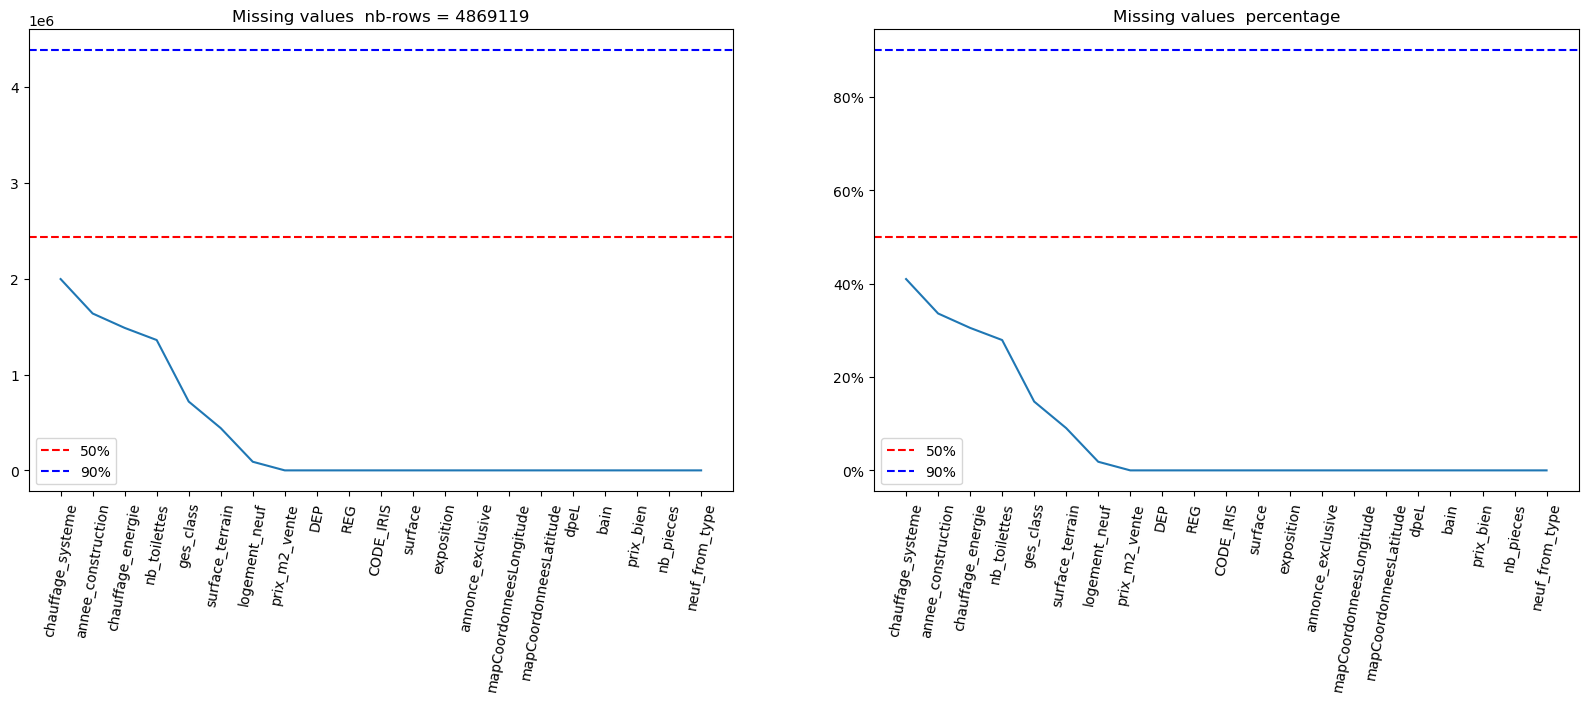

In [15]:
#  stats on Nans, display Nans for all columns
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick

missing_values = df.isna().sum()
missing_values = missing_values.sort_values(ascending=False)
full_columns = df.columns[ df.isna().any() == False ]
print (f" nb_rows {nb_rows} nb_cols {nb_cols}")
# print(f"columns without Nan values {full_columns.size} / {nb_cols}" )
# print (f"columns without Nans {full_columns}")
# print (missing_values)
plt.figure(figsize=(20,6))
ax = plt.subplot(121)
plt.plot (missing_values.index,missing_values.values)
plt.axhline(y=int(nb_rows/2), color='r', linestyle='--', label='50%')
plt.axhline(y=int(nb_rows*0.9), color='b', linestyle='--', label='90%')
plt.legend()

plt.xticks(rotation=80)
plt.title(f"Missing values  nb-rows = {nb_rows}")
ax2 = plt.subplot(122)
missing_values_percent = (missing_values/nb_rows)*100.0
plt.plot (missing_values_percent.index,missing_values_percent.values)
plt.axhline(y=50.0, color='r', linestyle='--', label='50%')
plt.axhline(y=90.0, color='b', linestyle='--', label='90%')
plt.xticks(rotation=80)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(100)) 
plt.title(f"Missing values  percentage")
plt.legend()
plt.show()

In [16]:
# df.loc[df['dpeL'].isin(['Classe indeterminee','Blank','0 kWh/m².year']),'dpeC']

In [17]:
# # drop columns with too many nans
# print (df.shape)
# threshold_start = .9
# threshold = int(nb_rows*threshold_start)
# empty_cols = []
# for name,_ in df.items() :
#     if df[name].isna().sum() > threshold :
#         empty_cols.append(name) 
# print (f"empty cols {empty_cols}")

# # remove unnecessary columns
# # columns = ["typedebien","typedetransaction","mensualiteFinance","nb_terraces"]
# # df = df.drop(columns=columns)

🆗 Meme résultat que Clement

In [18]:
df.isna().sum()

surface                          0
surface_terrain             440867
nb_pieces                        0
prix_bien                        0
bain                             0
dpeL                             0
mapCoordonneesLatitude           0
mapCoordonneesLongitude          0
annonce_exclusive                0
exposition                       0
ges_class                   717997
annee_construction         1637005
nb_toilettes               1359904
chauffage_energie          1486696
chauffage_systeme          1996256
logement_neuf                89958
CODE_IRIS                        0
REG                              0
DEP                              0
prix_m2_vente                    0
neuf_from_type                   0
dtype: int64

In [19]:
colonnes_num_prim = ['surface', 'surface_terrain',  'prix_m2_vente']

# Création du masque en utilisant apply
mask = df[colonnes_num_prim].apply(lambda x: (x >= x.quantile(0.01)) & (x <= x.quantile(0.99))| x.isna()).all(axis=1)
#ne garder que les lignes qui sont entre q=0.01 et q=0.99
df=df[mask]
#Vérification des résultats
df[colonnes_num_prim].describe()

,surface,surface_terrain,prix_m2_vente
count,2632183.00,2219602.00,2632183.00
mean,129.68,1364.86,2681.34
std,55.66,2394.94,1372.00
min,43.00,36.55,426.47
25%,91.00,400.00,1721.64
50%,116.00,679.00,2429.35
75%,152.00,1292.00,3350.00
max,400.00,27000.00,8806.45


In [20]:
colonnes_num_sec = ['bain', 'nb_toilettes', 'nb_pieces']
#limiter les colonnes à q=0.99 pour éliminer les outliers
df.loc[:,'bain'] = df['bain'].clip(upper=df['bain'].quantile(0.99))
df.loc[:,'nb_toilettes'] = df['nb_toilettes'].clip(upper=df['nb_toilettes'].quantile(0.99))
df.loc[:,'nb_pieces'] = df['nb_pieces'].clip(upper=df['nb_pieces'].quantile(0.99))

df[colonnes_num_sec].describe()

,bain,nb_toilettes,nb_pieces
count,2632183.00,1346078.00,2632183.00
mean,0.59,1.82,5.29
std,0.72,0.79,1.69
min,0.00,0.00,1.00
25%,0.00,1.00,4.00
50%,0.00,2.00,5.00
75%,1.00,2.00,6.00
max,3.00,5.00,11.00


#### Traitement NA

In [21]:
#remplacer les NA dans 'surface_terrain' par 0. C'est probablement des maisons sans jardins : maisons de ville
df.loc[df['surface_terrain'].isna(),'surface_terrain']=0
df[colonnes_num_prim].describe()

,surface,surface_terrain,prix_m2_vente
count,2632183.00,2632183.00,2632183.00
mean,129.68,1150.92,2681.34
std,55.66,2254.53,1372.00
min,43.00,0.00,426.47
25%,91.00,230.00,1721.64
50%,116.00,556.00,2429.35
75%,152.00,1100.00,3350.00
max,400.00,27000.00,8806.45


In [22]:
#Traitement des NA dans nb_toilettes
mask = (df['nb_toilettes'].isna()==False) & (df['nb_toilettes']!=0)
#calculer la moyenne de nb_toilettes / surface 
wcPerSurface=(df[mask]['nb_toilettes']/df[mask]['surface']).mean()
x=df[~mask].index.values
#remplacer les NA par la moyenne calculer * surface
df.loc[~mask,'nb_toilettes']=round(df[~mask]['surface']*wcPerSurface)


In [23]:
df[colonnes_num_sec].describe()

,bain,nb_toilettes,nb_pieces
count,2632183.00,2632183.00,2632183.00
mean,0.59,1.79,5.29
std,0.72,0.82,1.69
min,0.00,1.00,1.00
25%,0.00,1.00,4.00
50%,0.00,2.00,5.00
75%,1.00,2.00,6.00
max,3.00,6.00,11.00


In [24]:
#traitement des NA dans logement_neuf avec type de bien original
df.loc[df['logement_neuf'].isna(), 'logement_neuf'] = df.loc[df['logement_neuf'].isna(),'neuf_from_type']

## Colonnes catégorielles

In [25]:
df['dpeL'].unique()

array(['0', 'D', 'G', 'A', 'C', 'E', 'F', 'B', 'NS', 'VI', 'Blank',
       '0 kWh/m².year', 'Classe indeterminee', 'D kWh/m².year',
       'E kWh/m².year', 'C kWh/m².year', 'F kWh/m².year', '856',
       'A kWh/m².year', 'B kWh/m².year', '26'], dtype=object)

In [26]:
# #  analyze prix de vente , chop at 20000 
# plt.figure(figsize=(22,6))
# plt.subplot(151)
# sns.boxplot(df['prix_m2_vente'])
# plt.subplot(152)
# sns.histplot(df['prix_m2_vente'])
# plt.subplot(153)
# df = df [df['prix_m2_vente'] <20000].reset_index(drop=True)

# sns.scatterplot (df,x="surface",y="prix_m2_vente")
# plt.subplot(154)
# sns.histplot(df['prix_m2_vente'])
# plt.subplot(155)
# sns.boxplot(df['prix_m2_vente'])
# plt.show()


❎ Des prix à ZERO (sur les 2 regions). Des points à investiguer

In [27]:
# display unique values for categorial columns for analysis

columns_categorial = df.select_dtypes(include="object").columns.tolist()
for column in columns_categorial:
    print(f"{column}: {df[column].unique()}")

dpeL: ['0' 'D' 'G' 'A' 'C' 'E' 'F' 'B' 'NS' 'VI' 'Blank' '0 kWh/m².year'
 'Classe indeterminee' 'D kWh/m².year' 'E kWh/m².year' 'C kWh/m².year'
 'F kWh/m².year' '856' 'A kWh/m².year' 'B kWh/m².year' '26']
annonce_exclusive: ['0' 'Oui' 'Non']
exposition: ['0' 'Sud-Ouest' 'Sud' 'Sud/Est' 'Est-Ouest' 'Nord-Sud' 'sud-ouest'
 'Ouest' 'sud-est' 'Traversant-Est-Ouest' 'Est' 'traversant' 'Sud-Est'
 'SO' 'nord-est / sud-ouest' 'Nord-Ouest' 'Sud-Est-Ouest' 'Nord-Est'
 'Nord' 'NE' 'Sud/Ouest' 'NS' 'Nord/Ouest' 'SUD EST'
 'nord-ouest / sud-est' 'SUD' 'Nord Sud Est Ouest' 'EST SUD OUEST'
 'Nord Sud Ouest' 'N' 'Nord Est Ouest' 'Est - Ouest' 'NO' 'Nord Sud Est'
 'Sud-Sud/Est' 'traversant nord-sud' 'Nord-est' 'sud,est' 'Nord-ouest'
 'sud est' 'Sur Est' 'nord,est' 'sud,ouest' 'Nord, Sud' 'SUD-EST-OUEST'
 'est,ouest' 'nord,sud' 'Est, Ouest' 'Sud/ouest' 'Nord-Sud-Est-Ouest'
 'Nord, Est, Ouest, Sud' 'Ouest Sud' 'N/S' 'est ouest' 'EST' 'EST-OUEST'
 'TRIPLE EXPOSITION' 'Sud-Ouest - Nord-Est' 'Triple' 'est s

684834
ges_class
Unknown    762955
B          398006
A          364826
C          291524
D          282835
E          211274
F/G        147261
F          106774
G           66728
Name: count, dtype: int64


<Axes: xlabel='ges_class', ylabel='Count'>

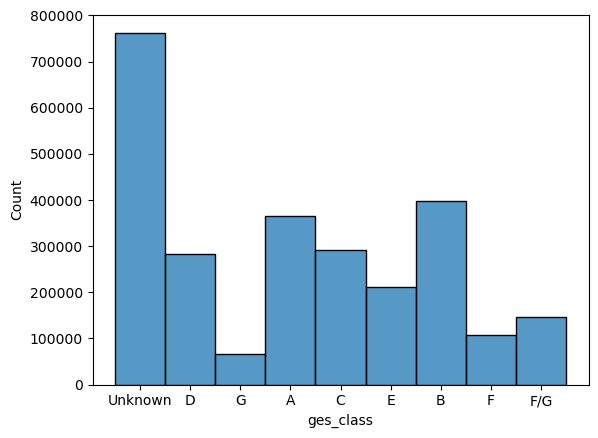

In [28]:
# process categorial ges_class : gaz a effet de serre : set to unknown
print(df["ges_class"].isna().sum())
df["ges_class"] = df["ges_class"].fillna("Unknown")
df["ges_class"] = df["ges_class"].replace(to_replace=["D - 49 kg CO2/m².year","E-41 kg CO2/m².year","Blank","0 kg CO2/m².year"],value=["D","E","Unknown","Unknown"])
df["ges_class"] = df["ges_class"].replace(to_replace=["VI"],value=["F/G"])
df["ges_class"] = df["ges_class"].replace(to_replace=["A kg CO2/m².year","E kg CO2/m².year","B kg CO2/m².year","D kg CO2/m².year","F kg CO2/m².year","NS"],value=["A","E","B","D","F","Unknown"])
#df['ges_class'] = pd.Categorical(df['ges_class'], ['0','A','B','C','D','E','F','F/G','G','Unknown'])

print(df["ges_class"].value_counts())

sns.histplot(df["ges_class"])


dpeL Uniques :  ['0' 'D' 'G' 'A' 'C' 'E' 'F' 'B' 'NS' 'VI' 'Blank' '0 kWh/m².year'
 'Classe indeterminee' 'D kWh/m².year' 'E kWh/m².year' 'C kWh/m².year'
 'F kWh/m².year' '856' 'A kWh/m².year' 'B kWh/m².year' '26']
NA number in dpeL :  0
dpeL
D                      585746
C                      387438
E                      385557
0                      376319
A                      250373
NS                     178735
VI                     144708
F                      139800
B                      104723
G                       78739
Blank                      20
D kWh/m².year               7
E kWh/m².year               5
0 kWh/m².year               2
Classe indeterminee         2
C kWh/m².year               2
856                         2
A kWh/m².year               2
F kWh/m².year               1
B kWh/m².year               1
26                          1
Name: count, dtype: int64

After modifications  : 
dpeL
D          585753
Unknown    555081
C          387440
E          385562

<Axes: xlabel='dpeL', ylabel='Count'>

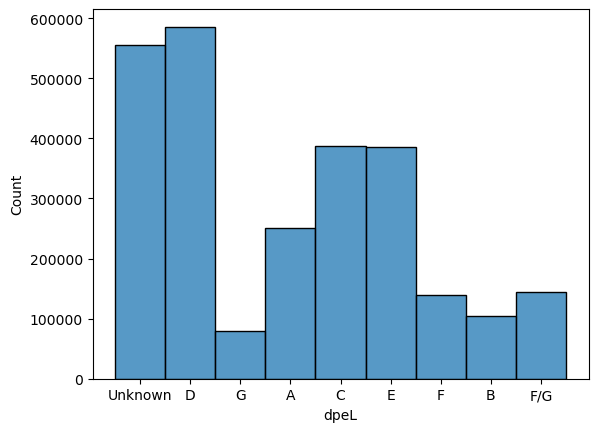

In [29]:
#  process categorial dpeL
#  NS means non significative
print("dpeL Uniques : ",df["dpeL"].unique())
print("NA number in dpeL : ",df["dpeL"].isna().sum())
print(df["dpeL"].value_counts(), end="\n\n")
df["dpeL"] = df["dpeL"].replace(to_replace=["C kWh/m².year","D - 231 kWh/m².year","D-218 kWh/m².year","D kWh/m².year","E kWh/m².year","Blank","NS",'0 kWh/m².year'],value=["C","D","D","D","E","Unknown","Unknown","Unknown"])
df["dpeL"] = df["dpeL"].replace(to_replace=["VI"],value=["F/G"])
df["dpeL"] = df["dpeL"].replace(to_replace=["Classe indeterminee","856","A kWh/m².year","F kWh/m².year","B kWh/m².year","26"],value=["Unknown","Unknown","A","F","B","Unknown"])
df["dpeL"] = df["dpeL"].replace(to_replace=["0"],value=["Unknown"])
#df['dpeL'] = pd.Categorical(df['dpeL'], ['0','A','B','C','D','E','F','F/G','G','Unknown'])

print ("After modifications  : ")
print(df["dpeL"].value_counts())

sns.histplot(df["dpeL"])


In [30]:
# # process categorial ges_class gaz a effet de serre : set to unknown
# print(df["ges_class"].isna().sum())
# df["ges_class"] = df["ges_class"].fillna("Unknown")
# df["ges_class"] = df["ges_class"].replace(to_replace=["D - 49 kg CO2/m².year","E-41 kg CO2/m².year","Blank","0"],value=["D","E","Unknown","Unknown"])
# df["ges_class"] = df["ges_class"].replace(to_replace=["VI"],value=["F/G"])
# #df['ges_class'] = pd.Categorical(df['ges_class'], ['0','A','B','C','D','E','F','F/G','G','Unknown'])
# print(df["ges_class"].value_counts())

# sns.histplot(df["ges_class"])


In [31]:
# #porcess categorial  chauffage mode, 50% isna
# print(df["chauffage_mode"].unique())
# print(df["chauffage_mode"].isna().sum())
# df["chauffage_mode"] = df["chauffage_mode"].fillna("unknown")
# print(df["chauffage_mode"].value_counts())
# df["chauffage_mode"] = df["chauffage_mode"].apply(lambda x : "Individuel"  if "Individuel" in x else x)
# df["chauffage_mode"] = df["chauffage_mode"].apply(lambda x : "Collectif"  if "Central" in x else x)
# print(df["chauffage_mode"].value_counts())

# sns.catplot(x="chauffage_mode",hue='typedebien',data=df, kind = 'count')


[None 'Fioul' 'Gaz' 'Électrique' 'Électrique, Bois' 'Bois' 'Gaz, Bois'
 'Bois, Fioul' 'Fioul, Bois' 'Fioul, Électrique' 'Gaz, Électrique'
 'Bois, Électrique' 'Électrique, Fioul' 'Électrique, Bois, Fioul'
 'Gaz, Électrique, Bois' 'Gaz, Bois, Électrique' 'Gaz, Fioul'
 'Gaz, Bois, Fioul' 'Bois, Fioul, Électrique' 'Électrique, Fioul, Bois'
 'Gaz, Électrique, Fioul' 'Gaz, Fioul, Bois'
 'Gaz, Électrique, Bois, Fioul' 'Gaz, Bois, Fioul, Électrique']
1404687
chauffage_energie
unknown                         1404687
Électrique                       520360
Gaz                              449935
Fioul                            200671
Bois                              24974
Électrique, Bois                  20741
Gaz, Bois                          4092
Bois, Fioul                        2911
Gaz, Électrique                    1441
Fioul, Bois                         980
Bois, Électrique                    447
Fioul, Électrique                   319
Électrique, Fioul                   252
Gaz, Él

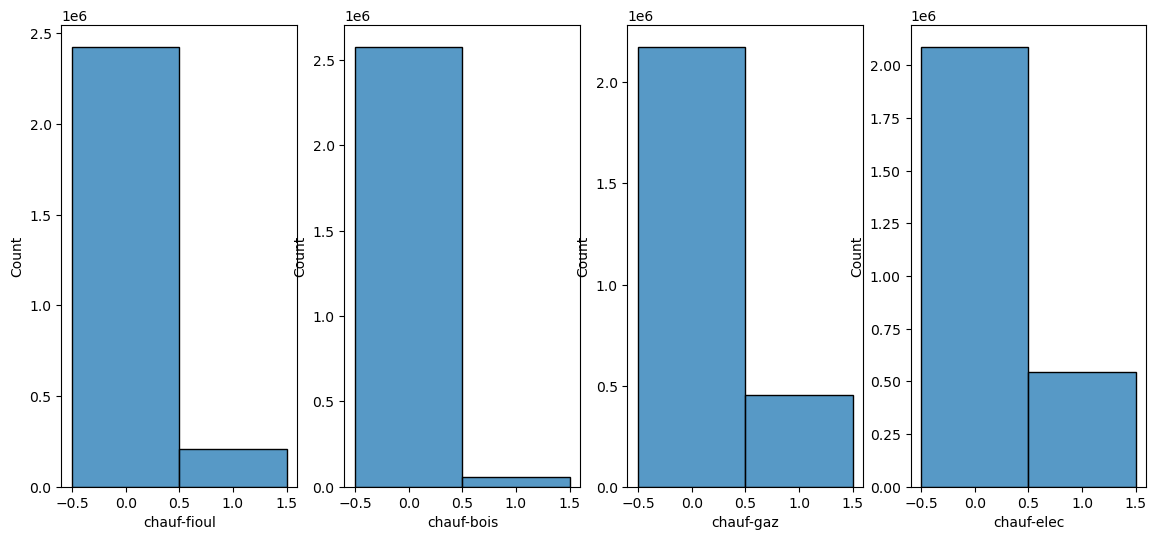

In [32]:
#process categorial chauffage energie
print(df["chauffage_energie"].unique())
print(df["chauffage_energie"].isna().sum())
df["chauffage_energie"] = df["chauffage_energie"].fillna("unknown")
print(df["chauffage_energie"].value_counts())
df['chauffage_energie'] = df['chauffage_energie'].str.lower()
df['chauffage_energie'] = df['chauffage_energie'].replace(to_replace=[", "," ,",","],value=[",",",",","],regex=True)


df["chauffage_energie"] = df["chauffage_energie"].replace(to_replace=["électrique"],value=["elec"],regex=True)
print(df["chauffage_energie"].unique())

#  create sub-categories
energies = ["gaz","elec","bois","fioul"]
for energy in energies :
    target = "chauf-" + energy
    print(target)
    df[target] = df["chauffage_energie"].apply(lambda x : 1 if energy in x else 0)
    print (df[target].value_counts())

"""
for energy in energies :
#  simplify chauffage-energie to first value
    df["chauffage_energie"] = df["chauffage_energie"].apply(lambda x : energy if x.startswith(energy) else x)
df['chauffage_energie'] = pd.Categorical(df['chauffage_energie'], energies)


# plt.figure(figsize=(14,8))
# sns.histplot(df["chauffage_energie"])
"""
plt.figure(figsize=(14,6))
plt.subplot(141)
sns.histplot(df["chauf-fioul"],discrete=True)
plt.subplot(142)
sns.histplot(df["chauf-bois"],discrete=True)
plt.subplot(143)
sns.histplot(df["chauf-gaz"],discrete=True)
plt.subplot(144)
sns.histplot(df["chauf-elec"],discrete=True)
plt.show()

#Supprimer la colonne "chauffage_energie" après l'encodage
df.drop(columns='chauffage_energie',inplace=True)

In [33]:
#Pourcentage des valeurs manquantes sur le chauffage energy
df.iloc[:,-4:].any(axis=1).mean()

0.46634143598678357

In [34]:
# df2=df.copy()

In [35]:
# df=pd.DataFrame()
# df=df2.copy()

In [36]:
# process categorial  systeme de chaufage



print(df["chauffage_systeme"].unique())
print(df["chauffage_systeme"].isna().sum())
df["chauffage_systeme"] = df["chauffage_systeme"].fillna("unknown")

df['chauffage_systeme'] = df['chauffage_systeme'].str.lower()
df['chauffage_systeme'] = df['chauffage_systeme'].replace(to_replace=[", "," ,",","],value=[",",",",","],regex=True)

name = "fluide caloporteur"
df["chauffage_systeme"] = df["chauffage_systeme"].apply(lambda x : "pompe à chaleur" if name in x else x)

#  create sub-categories
#energies = ["climatisation","pompe à chaleur","convecteur","radiateur","chaudière","sol","poêle à bois"]
energies = ["radiateur","pompe à chaleur","poêle à bois"]
#outers = ["climatisation","pompe-chaleur","convecteur","radiateur","chaudière","sol","poêle-bois"]
outers = ["radiateur","pompe à chaleur","poêle à bois"]
for energy,outer in zip(energies,outers) :
    target = "chauf-sys-" + outer
    print(target)
    df[target] = df["chauffage_systeme"].apply(lambda x : 1 if energy in x else 0)
    print (df[target].value_counts())
# sort by decreasing importance
"""
energies = ["climatisation révérsible","pompe à chaleur","sol","convecteur","radiateur","chaudière","poêle à bois"]
for name in energies : 
    df["chauffage_systeme"] = df["chauffage_systeme"].apply(lambda x : name if name in x else x)
df['chauffage_systeme'] = pd.Categorical(df['chauffage_systeme'], energies)


plt.figure(figsize=(8,6))
sns.histplot(df["chauffage_systeme"])
plt.xticks(rotation=70)
plt.show()

plt.figure(figsize=(20,6))

plt.subplot(171)
sns.histplot(df["chauf-sys-climatisation"],discrete=True)

plt.subplot(172)
sns.histplot(df["chauf-sys-pompe-chaleur"],discrete=True)

plt.subplot(173)
sns.histplot(df["chauf-sys-convecteur"],discrete=True)

plt.subplot(174)
sns.histplot(df["chauf-sys-radiateur"],discrete=True)

plt.subplot(175)
sns.histplot(df["chauf-sys-chaudière"],discrete=True)
plt.subplot(176)
sns.histplot(df["chauf-sys-sol"],discrete=True)
plt.subplot(177)
sns.histplot(df["chauf-sys-poêle-bois"],discrete=True)
"""


[None 'Radiateur' 'Pompe à chaleur' 'Poêle à Bois' 'Sol' 'Cheminée'
 'Pompe à chaleur, Sol' 'Radiateur, Poêle à Bois'
 'Climatisation révérsible' 'Sol, Poêle à Bois' 'Chaudière'
 'Pompe à chaleur, Radiateur' 'Pompe à chaleur, Poêle à Bois' 'Convecteur'
 'Pompe à chaleur, Climatisation révérsible' 'Sol, Radiateur'
 'Pompe à chaleur, Sol, Radiateur' 'Pompe à chaleur, Convecteur'
 'Convecteur, Poêle à Bois' 'Cheminée, Chaudière'
 'Pompe à chaleur, Cheminée' 'Cheminée, Poêle à Bois'
 'Radiateur, Cheminée' 'Sol, Cheminée'
 'Convecteur, Cheminée, Poêle à Bois' 'Radiateur, Chaudière'
 'Climatisation révérsible, Poêle à Bois' 'Sol, Chaudière'
 'Sol, Radiateur, Poêle à Bois' 'Sol, Convecteur' 'Convecteur, Cheminée'
 'Cheminée, Climatisation révérsible'
 'Radiateur, Climatisation révérsible'
 'Pompe à chaleur, Sol, Poêle à Bois'
 'Convecteur, Climatisation révérsible' 'Sol, Climatisation révérsible'
 'Radiateur, Chaudière, Climatisation révérsible'
 'Convecteur, Chaudière, Climatisation révérsib

'\nenergies = ["climatisation révérsible","pompe à chaleur","sol","convecteur","radiateur","chaudière","poêle à bois"]\nfor name in energies : \n    df["chauffage_systeme"] = df["chauffage_systeme"].apply(lambda x : name if name in x else x)\ndf[\'chauffage_systeme\'] = pd.Categorical(df[\'chauffage_systeme\'], energies)\n\n\nplt.figure(figsize=(8,6))\nsns.histplot(df["chauffage_systeme"])\nplt.xticks(rotation=70)\nplt.show()\n\nplt.figure(figsize=(20,6))\n\nplt.subplot(171)\nsns.histplot(df["chauf-sys-climatisation"],discrete=True)\n\nplt.subplot(172)\nsns.histplot(df["chauf-sys-pompe-chaleur"],discrete=True)\n\nplt.subplot(173)\nsns.histplot(df["chauf-sys-convecteur"],discrete=True)\n\nplt.subplot(174)\nsns.histplot(df["chauf-sys-radiateur"],discrete=True)\n\nplt.subplot(175)\nsns.histplot(df["chauf-sys-chaudière"],discrete=True)\nplt.subplot(176)\nsns.histplot(df["chauf-sys-sol"],discrete=True)\nplt.subplot(177)\nsns.histplot(df["chauf-sys-poêle-bois"],discrete=True)\n'

In [37]:
df.drop(columns='chauffage_systeme',inplace=True)

In [38]:
df.iloc[:,-3:].any(axis=1).mean()

0.24951874546716546

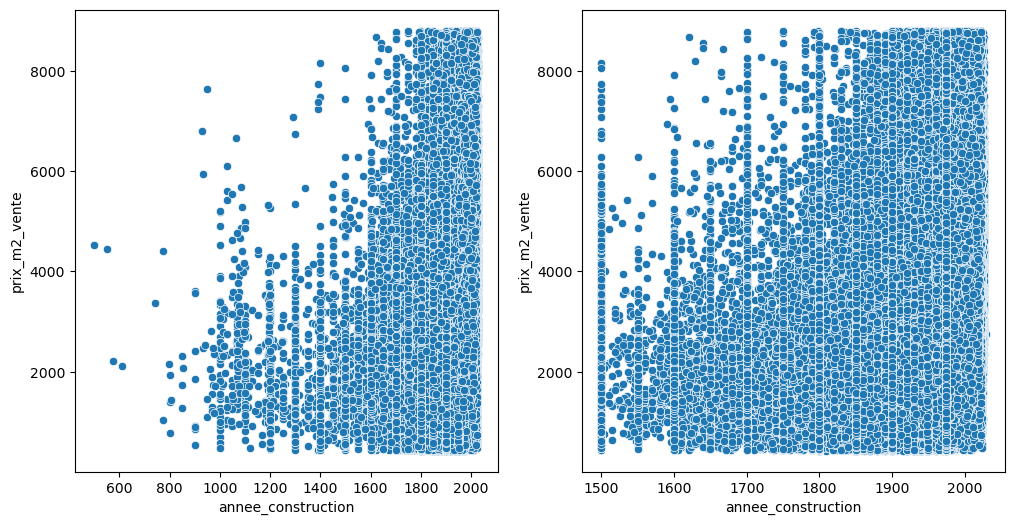

In [39]:
# process annee_construction

plt.figure(figsize=(12,6))
plt.subplot(121)
sns.scatterplot(y=df["prix_m2_vente"],x=df['annee_construction'])

#df['annee_construction'] = df['annee_construction'].apply(lambda x : 1500  if x < 1500 else x)
df['annee_construction'] = df['annee_construction'].clip(lower=1500)

df["annee_construction"] = df["annee_construction"].fillna(df["annee_construction"].median())
df["annee_construction"] = df["annee_construction"].astype("int")

plt.subplot(122)
sns.scatterplot(y=df["prix_m2_vente"],x=df['annee_construction'])
plt.show()

In [40]:
# #  process surface_terrain
# plt.figure(figsize=(12,6))
# plt.subplot(121)
# sns.scatterplot(y=df["prix_m2_vente"],x=df['surface_terrain'])

# df['surface_terrain'] = df['surface_terrain'].apply(lambda x : 60000  if x > 60000 else x)
# df["surface_terrain"].unique()
# df["surface_terrain"] = df["surface_terrain"].fillna(df["surface_terrain"].median())

# plt.subplot(122)
# sns.scatterplot(y=df["prix_m2_vente"],x=df['surface_terrain'])
# plt.show()


In [41]:
"""
#  scatter plot of each column / prix_m2_vente
df.sort_values(by="prix_m2_vente",ascending=True)
columns = df.columns
print (type(columns))
nrows = int(columns.size/4) +1
fig , axes = plt.subplots(nrows = nrows, ncols = 4, figsize = (25,50))
index = 0
for column in columns :
    if column not in ["idannonce","date"] :
        sns.scatterplot(ax=axes[int(index/4),index%4],y=df["prix_m2_vente"],x=df[column])
        index = index +1
"""

'\n#  scatter plot of each column / prix_m2_vente\ndf.sort_values(by="prix_m2_vente",ascending=True)\ncolumns = df.columns\nprint (type(columns))\nnrows = int(columns.size/4) +1\nfig , axes = plt.subplots(nrows = nrows, ncols = 4, figsize = (25,50))\nindex = 0\nfor column in columns :\n    if column not in ["idannonce","date"] :\n        sns.scatterplot(ax=axes[int(index/4),index%4],y=df["prix_m2_vente"],x=df[column])\n        index = index +1\n'

In [42]:
# import numpy as np
# #  process nans for numercial columns

# #   nb_toilettes set Nan to 1
# df["nb_toilettes"] = df["nb_toilettes"].fillna(1).astype(int)
# print (df["nb_toilettes"].isna().sum())
# df['nb_toilettes'] = df['nb_toilettes'].apply(lambda x : 10  if x > 10 else x)

# #   dpec set Nan to 0
# df["dpeC"] = df["dpeC"].fillna(0)
# print (df["dpeC"].isna().sum())

# # nb_etages set Nan to mean value
# df["nb_etages"] = df["nb_etages"].fillna(df["nb_etages"].median()).astype(int)

# # porte digicode set Nan to False
# print (df['porte_digicode'].isna().sum())
# df["porte_digicode"] = df["porte_digicode"].fillna(False)

# # loyer fillna to zero
# attributes = ["loyer_m2_median_n6","nb_log_n6","taux_rendement_n6"]
# for attribute in attributes :
#     df[attribute]= df[attribute].fillna(0)
    
# attributes = ["loyer_m2_median_n7","nb_log_n7","taux_rendement_n7"]
# for attribute in attributes :
#     df[attribute]= df[attribute].fillna(0)


# # nb_terrace remove surious value
# df['nb_terraces'] = df['nb_terraces'].apply(lambda x : df['nb_terraces'].median()  if x >200  else x)
# df["nb_terraces"] = df["nb_terraces"].fillna(0)

# # cave fillna 0
# df["cave"] = df["cave"].fillna(0)

# # logement neuf
# df["logement_neuf"] = df["logement_neuf"].fillna('u')

# # ascenceur
# print (df["duree_int"].unique())
# df["duree_int"] = df["duree_int"].fillna(0)


In [43]:
print (df.isna().sum())


surface                      0
surface_terrain              0
nb_pieces                    0
prix_bien                    0
bain                         0
dpeL                         0
mapCoordonneesLatitude       0
mapCoordonneesLongitude      0
annonce_exclusive            0
exposition                   0
ges_class                    0
annee_construction           0
nb_toilettes                 0
logement_neuf                0
CODE_IRIS                    0
REG                          0
DEP                          0
prix_m2_vente                0
neuf_from_type               0
chauf-gaz                    0
chauf-elec                   0
chauf-bois                   0
chauf-fioul                  0
chauf-sys-radiateur          0
chauf-sys-pompe à chaleur    0
chauf-sys-poêle à bois       0
dtype: int64


⚠  Nous avons encore des valeurs manquantes : 

In [44]:
print (df.isna().sum().sum())

0


In [45]:

# # charges copro for appartement
# # charges copro / remove spurious value
# # df = df.reindex(sorted(df.columns), axis=1)

# import numpy as np

# print (f"copro isna {df.charges_copro.isna().sum()}")
# print (f"copro isna {df.charges_copro.value_counts()}")

# dfa = df [df["typedebien"] == "a"]
# """
# plt.figure(figsize=(12,6))
# plt.subplot(121)
# sns.histplot(dfa["charges_copro"])
# plt.subplot(122)
# sns.boxplot(dfa["charges_copro"])
# # print (df["charges_copro"].unique())
# """
# print (f"charge de copro min = {dfa['charges_copro'].min()}, charge de copro max =  {dfa['charges_copro'].max()} ")

# # filna with median values
# # df['charges_copro'] = df['charges_copro'].fillna(0)

# plt.show()
# max_value = 8000
# plt.figure(figsize=(18,6))
# dfa.loc[lambda x : dfa ["charges_copro"] > max_value,"charges_copro"] = max_value
# plt.subplot(131)
# sns.histplot(dfa["charges_copro"])
# plt.subplot(132)
# sns.boxplot(dfa["charges_copro"])
# #  build charge_copro_cat
# bins = np.arange(0,max_value,250).tolist()
# labels = [str(x) for x in bins]
# labels.pop()
# dfa['charges_copro_cat']=pd.cut(x = dfa['charges_copro'],bins=bins,labels=labels,include_lowest = True)
# plt.subplot(133)
# sns.histplot(dfa["charges_copro_cat"],bins=250)
# plt.xticks(rotation=90)
# plt.show()
# #  build charge_copro_per_m2
# dfa['charges_copro_per_m2']= dfa['charges_copro']/dfa['surface']

# sns.relplot(dfa,x="charges_copro_per_m2",y="prix_m2_vente")
# plt.show()

### traitement des expositions
4 colonnes de plus : Nord,Sud,Est,Ouest qui reprennent simplement l'existance de l'exposition dans la description


In [46]:
import re

def encode_exposition_advanced(df):
    """
    Encodage avancé de la colonne exposition pour modèles ML
    """
    # Nettoyage initial 
    df['exposition_clean'] = df['exposition'].astype(str).str.lower()
    df['exposition_clean'] = df['exposition_clean'].str.replace(r'[^\w\s/-]', '', regex=True)
    
    # 1. Variables binaires par direction (ordre important pour éviter les conflits)
    def detect_directions(expo_text):
        """Détection intelligente des directions avec gestion des conflits"""
        if pd.isna(expo_text) or expo_text == 'nan':
            return {'nord': 0, 'sud': 0, 'est': 0, 'ouest': 0}
        
        text = str(expo_text).lower()
        directions = {'nord': 0, 'sud': 0, 'est': 0, 'ouest': 0}
        """
        # Détection des directions composées d'abord (pour éviter les conflits)
        if re.search(r'\bnord-est\b|\bne\b', text):
            directions['nord'] = True
            directions['est'] = True
        if re.search(r'\bnord-ouest\b|\bno\b', text):
            directions['nord'] = True
            directions['ouest'] = True
        if re.search(r'\bsud-est\b|\bse\b', text):
            directions['sud'] = True
            directions['est'] = True
        if re.search(r'\bsud-ouest\b|\bso\b', text):
            directions['sud'] = True
            directions['ouest'] = True
        
        # Puis détection des directions simples
        if re.search(r'\bnord\b', text) and not any(x in text for x in ['nord-est', 'nord-ouest']):
            directions['nord'] = True
        if re.search(r'\bsud\b', text) and not any(x in text for x in ['sud-est', 'sud-ouest']):
            directions['sud'] = True
        if re.search(r'\best\b', text) and not any(x in text for x in ['nord-est', 'sud-est']):
            directions['est'] = True
        if re.search(r'\bouest\b', text) and not any(x in text for x in ['nord-ouest', 'sud-ouest']):
            directions['ouest'] = True
        """
        #Traitement des expositions en mélangeant Nord-Est avec les deux directions nord ET est 
        if re.search(r'\bnord\b', text) :
            directions['nord'] = 1
        if re.search(r'\bsud\b', text) :
            directions['sud'] = 1
        if re.search(r'\best\b', text) :
            directions['est'] = 1
        if re.search(r'\bouest\b', text) :
            directions['ouest'] = 1

        # Gestion des abréviations isolées (plus prudente)
        words = re.sub(r'[-+/]', ' ', text).split()
        for word in words:
            if word == 'n' :
                directions['nord'] = 1
            elif word == 's' :
                directions['sud'] = 1
            elif word == 'e' :
                directions['est'] = 1
            elif word == 'o' :
                directions['ouest'] = 1
        
        return directions
    
    # Application de la détection
    direction_results = df['exposition_clean'].apply(detect_directions)
    for direction in ['nord', 'sud', 'est', 'ouest']:
        df[f'has_{direction}'] = [result[direction] for result in direction_results]

    return 

encode_exposition_advanced(df)
df.drop(columns=['exposition','exposition_clean'],inplace=True)

In [47]:
# display unique values for categorial columns for analysis

columns_categorial = df.select_dtypes(include="object").columns.tolist()
for column in columns_categorial:
    print(f"{column}: {df[column].unique()}")

dpeL: ['Unknown' 'D' 'G' 'A' 'C' 'E' 'F' 'B' 'F/G']
annonce_exclusive: ['0' 'Oui' 'Non']
ges_class: ['Unknown' 'D' 'G' 'A' 'C' 'E' 'B' 'F' 'F/G']


In [48]:
print( '#########################################')
print('nombre de NA dans df' )
print( '#########################################')
print(df.isna().sum(),end="\n\n\n")
print( '#########################################')
print ('df info')
print( '#########################################')
df.info(show_counts=True)

#########################################
nombre de NA dans df
#########################################
surface                      0
surface_terrain              0
nb_pieces                    0
prix_bien                    0
bain                         0
dpeL                         0
mapCoordonneesLatitude       0
mapCoordonneesLongitude      0
annonce_exclusive            0
ges_class                    0
annee_construction           0
nb_toilettes                 0
logement_neuf                0
CODE_IRIS                    0
REG                          0
DEP                          0
prix_m2_vente                0
neuf_from_type               0
chauf-gaz                    0
chauf-elec                   0
chauf-bois                   0
chauf-fioul                  0
chauf-sys-radiateur          0
chauf-sys-pompe à chaleur    0
chauf-sys-poêle à bois       0
has_nord                     0
has_sud                      0
has_est                      0
has_ouest                  

In [49]:
# pd.concat([df.iloc[:,-5:],df['exposition']],axis=1)[df['exposition']=='N-O']

In [50]:
# df.iloc[:,-4:]==0

In [51]:
# dir=['nord','sud', 'est', 'ouest']
# counts=[df[f'has_{d}'].sum() for d in dir]


In [52]:
# ((df[[f'has_{d}' for d in dir]]==0).sum(axis=1)==4).sum()

In [53]:
# counts.append(((df[[f'has_{d}' for d in dir]]==0).sum(axis=1)==4).sum())
# counts

In [54]:
# plt.bar([*dir,'NAN'],counts)

In [55]:
df.info(show_counts=1)

<class 'pandas.core.frame.DataFrame'>
Index: 2632183 entries, entities-1037638-4560933 to 143384467
Data columns (total 29 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   surface                    2632183 non-null  int64  
 1   surface_terrain            2632183 non-null  float64
 2   nb_pieces                  2632183 non-null  int64  
 3   prix_bien                  2632183 non-null  int64  
 4   bain                       2632183 non-null  int64  
 5   dpeL                       2632183 non-null  object 
 6   mapCoordonneesLatitude     2632183 non-null  float64
 7   mapCoordonneesLongitude    2632183 non-null  float64
 8   annonce_exclusive          2632183 non-null  object 
 9   ges_class                  2632183 non-null  object 
 10  annee_construction         2632183 non-null  int32  
 11  nb_toilettes               2632183 non-null  float64
 12  logement_neuf              2632183 non-null  float

## Corrélations

### Col_num : Pearson & spearman

<Axes: >

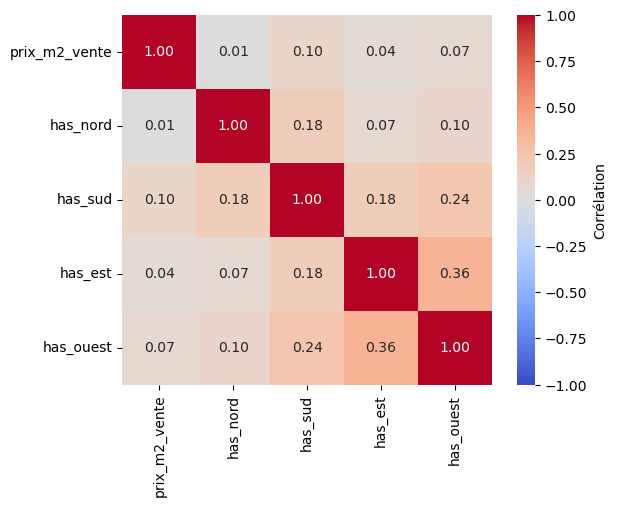

In [56]:
param = {
    'vmax': 1, 
    'vmin': -1, 
    'cmap': 'coolwarm', 
    'annot': True,
    'square': True,           # Cellules carrées
    'fmt': '.2f',            # Format des nombres (3 décimales)
    'cbar_kws': {'label': 'Corrélation'}  # Label de la colorbar
}
sns.heatmap(data=df[['prix_m2_vente', 'has_nord', 'has_sud', 'has_est', 'has_ouest']].corr(),**param)

<Axes: >

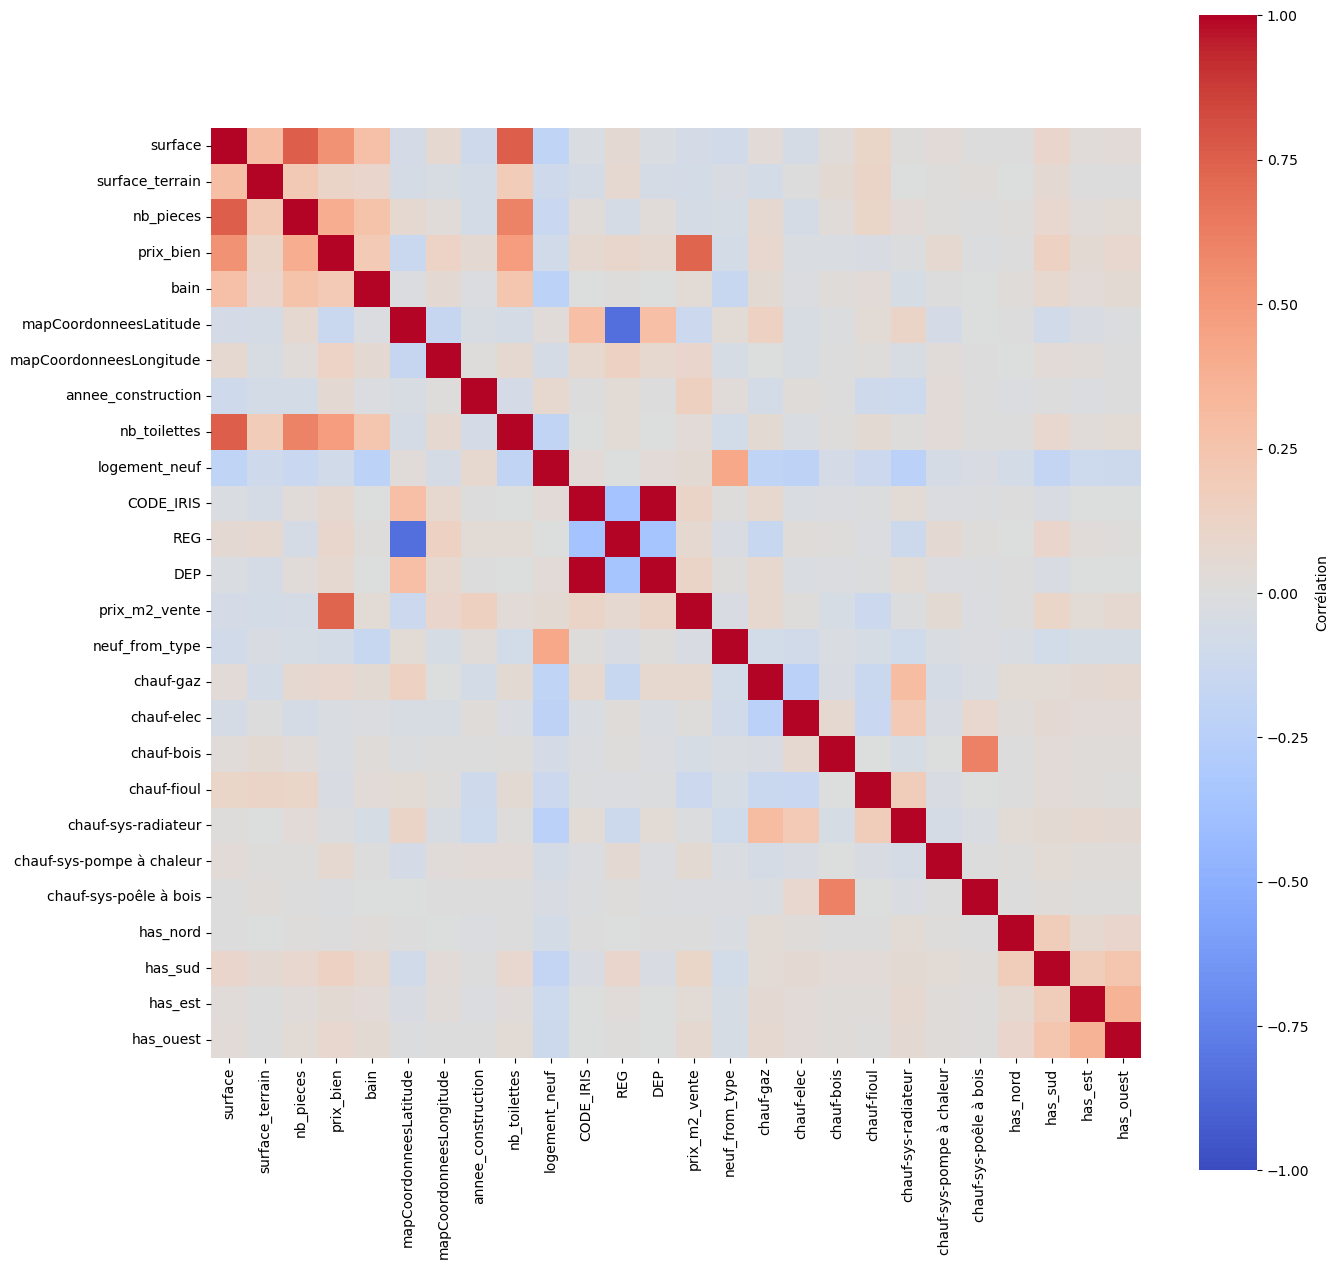

In [57]:
num_types=['int64','float64','int32']
plt.figure(figsize=[15,15])

param = {
    'vmax': 1, 
    'vmin': -1, 
    'cmap': 'coolwarm', 
    #'annot': True,
    'square': True,           # Cellules carrées
    #'fmt': '.2f',            # Format des nombres (3 décimales)
    'cbar_kws': {'label': 'Corrélation'}  # Label de la colorbar
}
sns.heatmap(data=df.select_dtypes(include='number').corr(),**param)

<Axes: >

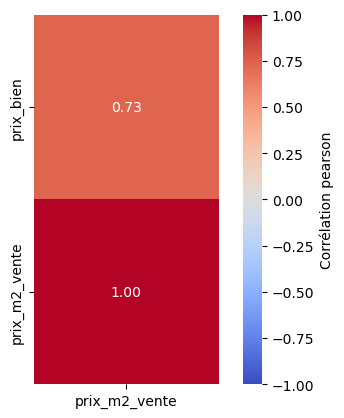

In [58]:
df_num_corr=df.select_dtypes(include='number').corr()
param = {
    'vmax': 1, 
    'vmin': -1, 
    'cmap': 'coolwarm', 
    'annot': True,
    'square': True,           # Cellules carrées
    'fmt': '.2f',            # Format des nombres (3 décimales)
    'cbar_kws': {'label': 'Corrélation pearson'}  # Label de la colorbar
}
sns.heatmap(data=df_num_corr[np.abs(df_num_corr)['prix_m2_vente']>0.3][['prix_m2_vente']],**param)

<Axes: >

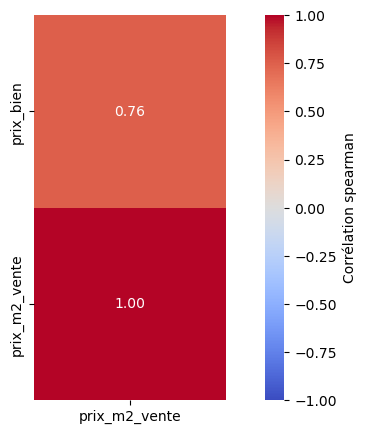

In [59]:
df_num_corr=df.select_dtypes(include='number').corr('spearman')
plt.figure(figsize=[10,5])
param = {
    'vmax': 1, 
    'vmin': -1, 
    'cmap': 'coolwarm', 
    'annot': True,
    'square': True,           # Cellules carrées
    'fmt': '.2f',            # Format des nombres (3 décimales)
    'cbar_kws': {'label': 'Corrélation spearman'}  # Label de la colorbar
}
sns.heatmap(data=df_num_corr[np.abs(df_num_corr)['prix_m2_vente']>0.3][['prix_m2_vente']],**param)

surface         0.54
nb_pieces       0.40
prix_bien       1.00
nb_toilettes    0.48
prix_m2_vente   0.73
Name: prix_bien, dtype: float64

<Axes: >

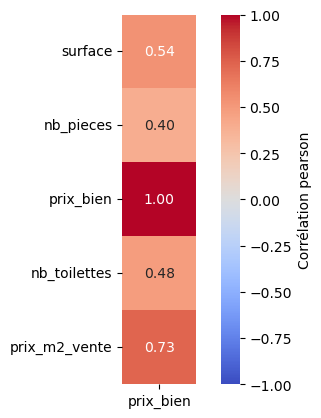

In [60]:
df_num_corr=df.select_dtypes(include='number').corr()

display (df_num_corr[np.abs(df_num_corr)['prix_bien']>0.3]['prix_bien'])

#plt.figure(figsize=[10,10])
param = {
    'vmax': 1, 
    'vmin': -1, 
    'cmap': 'coolwarm', 
    'annot': True,
    'square': True,           # Cellules carrées
    'fmt': '.2f',            # Format des nombres (3 décimales)
    'cbar_kws': {'label': 'Corrélation pearson'}  # Label de la colorbar
}
sns.heatmap(data=df_num_corr[np.abs(df_num_corr)['prix_bien']>0.3][['prix_bien']],**param)

surface         0.52
nb_pieces       0.41
prix_bien       1.00
nb_toilettes    0.46
prix_m2_vente   0.76
Name: prix_bien, dtype: float64

<Axes: >

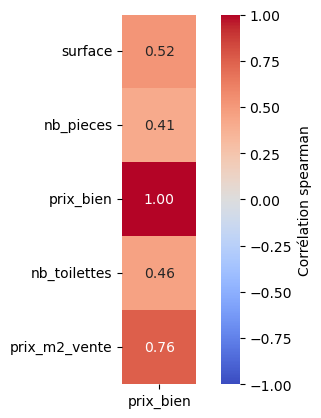

In [61]:
df_num_corr=df.select_dtypes(include='number').corr('spearman')

display(df_num_corr[np.abs(df_num_corr)['prix_bien']>0.3]['prix_bien'])

param = {
    'vmax': 1, 
    'vmin': -1, 
    'cmap': 'coolwarm', 
    'annot': True,
    'square': True,           # Cellules carrées
    'fmt': '.2f',            # Format des nombres (3 décimales)
    'cbar_kws': {'label': 'Corrélation spearman'}  # Label de la colorbar
}
sns.heatmap(data=df_num_corr[np.abs(df_num_corr)['prix_bien']>0.3][['prix_bien']],**param)


In [62]:
#df_num_corr=df.select_dtypes(include='number').corr('spearman')
df_num_corr['prix_bien']

surface                      0.52
surface_terrain              0.16
nb_pieces                    0.41
prix_bien                    1.00
bain                         0.18
mapCoordonneesLatitude      -0.13
mapCoordonneesLongitude      0.11
annee_construction           0.18
nb_toilettes                 0.46
logement_neuf               -0.04
CODE_IRIS                    0.08
REG                          0.11
DEP                          0.08
prix_m2_vente                0.76
neuf_from_type              -0.08
chauf-gaz                    0.08
chauf-elec                  -0.03
chauf-bois                  -0.03
chauf-fioul                 -0.07
chauf-sys-radiateur         -0.01
chauf-sys-pompe à chaleur    0.07
chauf-sys-poêle à bois      -0.01
has_nord                     0.01
has_sud                      0.14
has_est                      0.05
has_ouest                    0.08
Name: prix_bien, dtype: float64

### col non num : Anova


In [63]:
import pandas as pd
from scipy.stats import f_oneway
import numpy as np


def anova_vectorized(df, target_col, max_categories=10):
    """
    Version ultra-rapide pour gros datasets
    """
    cat_cols = df.select_dtypes(exclude='number').columns
    valid_cols = [col for col in cat_cols if df[col].nunique() <= max_categories]
    
    results = pd.DataFrame(index=valid_cols, columns=['f_stat', 'p_val'])
    
    for col in valid_cols:
        try:
            # Utiliser groupby directement sur le DataFrame
            groups = df.groupby(col)[target_col].apply(list)
            groups = [np.array(group) for group in groups if len(group) > 1000]
            
            if len(groups) >= 2:
                f_stat, p_val = f_oneway(*groups)
                results.loc[col] = [f_stat, round(p_val,3)]
        except:
            continue
    
    results = results.dropna().sort_values('p_val', ascending=False)
    return results

anova_vectorized(df,'prix_bien')

,f_stat,p_val
dpeL,18985.89,0.00
annonce_exclusive,11490.13,0.00
ges_class,9675.74,0.00


In [64]:
import pandas as pd
from scipy.stats import f_oneway
import numpy as np


def anova_vectorized(df, target_col, max_categories=10):
    """
    Version ultra-rapide pour gros datasets
    """
    cat_cols = df.select_dtypes(exclude='number').columns
    valid_cols = [col for col in cat_cols if df[col].nunique() <= max_categories]
    
    results = pd.DataFrame(index=valid_cols, columns=['f_stat', 'p_val'])
    
    for col in valid_cols:
        try:
            # Utiliser groupby directement sur le DataFrame
            groups = df.groupby(col)[target_col].apply(list)
            groups = [np.array(group) for group in groups if len(group) > 1000]
            
            if len(groups) >= 2:
                f_stat, p_val = f_oneway(*groups)
                results.loc[col] = [f_stat, round(p_val,3)]
        except:
            continue
    
    results = results.dropna().sort_values('p_val', ascending=False)
    return results

anova_vectorized(df,'prix_m2_vente')

,f_stat,p_val
dpeL,12226.91,0.00
annonce_exclusive,7869.95,0.00
ges_class,4762.07,0.00


In [65]:
# cat_cols[df[cat_cols].nunique()<10].to_list()+['prix_bien']

In [66]:
#!pip install statsmodels


In [67]:
display(table['PR(>F)'].iloc[:1].to_list())

NameError: name 'table' is not defined

In [ ]:
table['PR(>F)'].iloc[:1].to_list()

[0.0]

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.api import anova_lm

attributes = cat_cols[df[cat_cols].nunique()<10].to_list()
results = {}
feat_select = []


import statsmodels.api 
result = statsmodels.formula.api.ols('prix_bien ~ {}'.format(i), data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

for i in attributes : 
    result = statsmodels.formula.api.ols('prix_bien ~ {}'.format(i), data=df).fit()
    table = statsmodels.api.stats.anova_lm(result)
    results[i] = liste_p_value
    
    if liste_p_value[0] <= 0.05 :
        feat_select.append(i)
results



"""
for i in attributes : 
    lm = ols('{} ~ prix_bien'.format(i), data = df).fit()
    table = anova_lm(lm)
    liste_p_value = table['PR(>F)'].iloc[:1].to_list()
    results[i] = liste_p_value
    
    if liste_p_value[0] <= 0.05 :
        feat_select.append(i)
results

"""

NameError: name 'cat_cols' is not defined

In [ ]:
results

{'type_annonceur': [0.0],
 'typedebien': [0.0],
 'typedetransaction': [0.0],
 'annonce_exclusive': [0.0],
 'parking': [0.0],
 'cave': [0.0],
 'ges_class': [0.0],
 'videophone': [0.0],
 'porte_digicode': [0.0],
 'ascenseur': [0.0],
 'chauffage_energie': [0.0],
 'chauffage_systeme': [0.0],
 'chauffage_mode': [0.0],
 'categorie_annonceur': [0.0],
 'logement_neuf': [0.0],
 'typedebien_lite': [0.0],
 'TYP_IRIS_x': [0.0],
 'TYP_IRIS_y': [0.0]}

## Suite



In [ ]:
# plt.hist(df['chauffage_mode'])

<Axes: xlabel='chauffage_mode', ylabel='count'>

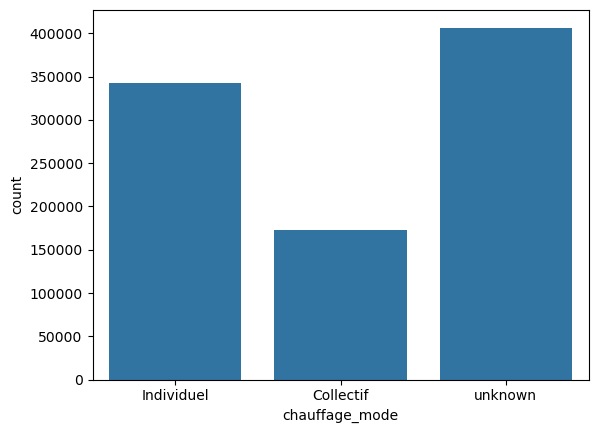

In [ ]:
# sns.countplot(data=df,x='chauffage_mode')

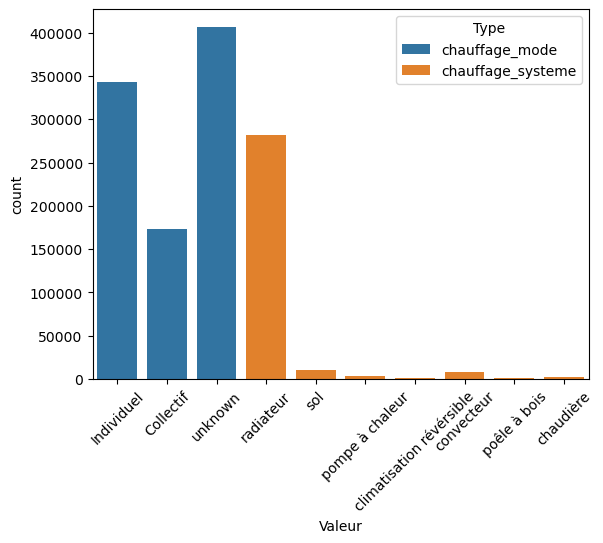

In [ ]:
# # Supposons que vous voulez comparer 'chauffage_mode' avec 'autre_colonne'
# df_melted = pd.melt(df, value_vars=['chauffage_mode', 'chauffage_systeme'], 
#                     var_name='Type', value_name='Valeur')

# sns.countplot(data=df_melted, x='Valeur', hue='Type')
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
# df['date']=pd.to_datetime(df['date'],format='%Y-%m').dt.strftime('%Y-%m')
# df.columns


Index(['idannonce', 'type_annonceur', 'typedebien', 'typedetransaction',
       'etage', 'surface', 'surface_terrain', 'nb_pieces', 'prix_bien',
       'prix_maison', 'prix_terrain', 'mensualiteFinance', 'balcon', 'eau',
       'bain', 'dpeL', 'dpeC', 'mapCoordonneesLatitude',
       'mapCoordonneesLongitude', 'annonce_exclusive', 'nb_etages', 'parking',
       'places_parking', 'cave', 'exposition', 'ges_class',
       'annee_construction', 'nb_toilettes', 'nb_terraces', 'videophone',
       'porte_digicode', 'surface_balcon', 'ascenseur', 'nb_logements_copro',
       'charges_copro', 'chauffage_energie', 'chauffage_systeme',
       'chauffage_mode', 'categorie_annonceur', 'logement_neuf', 'duree_int',
       'typedebien_lite', 'date', 'INSEE_COM', 'IRIS', 'CODE_IRIS',
       'TYP_IRIS_x', 'TYP_IRIS_y', 'GRD_QUART', 'UU2010', 'REG', 'DEP',
       'loyer_m2_median_n6', 'nb_log_n6', 'taux_rendement_n6',
       'loyer_m2_median_n7', 'nb_log_n7', 'taux_rendement_n7', 'prix_m2_vente',
    

In [ ]:
# df_app_select=df[df['typedebien']=='a'][['etage', 'surface', 'surface_terrain', 'nb_pieces', 'prix_bien',
#        'eau','bain', 'dpeL', 'dpeC', 'annonce_exclusive', 'nb_etages', 'parking',
#        'places_parking', 'cave',  'ges_class',
#        'annee_construction', 'nb_toilettes', 'nb_terraces', 'videophone',
#        'porte_digicode', 'surface_balcon', 'ascenseur', 'nb_logements_copro',
#        'charges_copro',  'categorie_annonceur', 'logement_neuf', 'duree_int',
#        'date', 'INSEE_COM', 'CODE_IRIS',
#        'GRD_QUART', 'UU2010', 'REG', 'DEP',
#        'loyer_m2_median_n6', 'nb_log_n6', 'taux_rendement_n6',
#        'loyer_m2_median_n7', 'nb_log_n7', 'taux_rendement_n7', 'prix_m2_vente',
#        'chauf-gaz', 'chauf-elec', 'chauf-bois', 'chauf-fioul',
#        'chauf-sys-climatisation', 'chauf-sys-pompe-chaleur',
#        'chauf-sys-convecteur', 'chauf-sys-radiateur', 'chauf-sys-chaudière',
#        'chauf-sys-sol', 'chauf-sys-poêle-bois', 'exposition_clean', 'has_nord',
#        'has_sud', 'has_est', 'has_ouest']]

# df_maison_select=df[df['typedebien']=='m'][['etage', 'surface', 'surface_terrain', 'nb_pieces', 'prix_bien',
#        'eau','bain', 'dpeL', 'dpeC', 'annonce_exclusive', 'nb_etages', 'parking',
#        'places_parking', 'cave',  'ges_class',
#        'annee_construction', 'nb_toilettes', 'nb_terraces',  'categorie_annonceur', 'logement_neuf', 'duree_int',
#        'date', 'INSEE_COM', 'CODE_IRIS',
#        'GRD_QUART', 'UU2010', 'REG', 'DEP',
#         'prix_m2_vente',
#        'chauf-gaz', 'chauf-elec', 'chauf-bois', 'chauf-fioul',
#        'chauf-sys-climatisation', 'chauf-sys-pompe-chaleur',
#        'chauf-sys-convecteur', 'chauf-sys-radiateur', 'chauf-sys-chaudière',
#        'chauf-sys-sol', 'chauf-sys-poêle-bois', 'exposition_clean', 'has_nord',
#        'has_sud', 'has_est', 'has_ouest']]

In [ ]:
# import statsmodels.formula.api as smf

,GRD_QUART
0,7511765
1,7511765
2,7511765
3,7511765
4,7511765
...,...
922195,9542701
922196,9528801
922197,9542701
922198,9542701


In [ ]:
# pd.set_option('display.max_columns',0)
# df_app_select.select_dtypes(exclude='number').info()

<class 'pandas.core.frame.DataFrame'>
Index: 604977 entries, 0 to 922199
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   dpeL                 604977 non-null  category
 1   annonce_exclusive    604977 non-null  object  
 2   parking              1394 non-null    object  
 3   cave                 604977 non-null  object  
 4   ges_class            604977 non-null  category
 5   videophone           15157 non-null   object  
 6   porte_digicode       604977 non-null  bool    
 7   ascenseur            413886 non-null  object  
 8   categorie_annonceur  604784 non-null  object  
 9   logement_neuf        604977 non-null  object  
 10  date                 604977 non-null  object  
 11  exposition_clean     604977 non-null  object  
dtypes: bool(1), category(2), object(9)
memory usage: 47.9+ MB


In [ ]:
# df['logement_neuf']


0

# 1st ML


## encoding

In [68]:
df.describe(include='object')

,dpeL,annonce_exclusive,ges_class
count,2632183,2632183,2632183
unique,9,3,9
top,D,Non,Unknown
freq,585753,1225522,762955


In [69]:
df.describe()

,surface,surface_terrain,nb_pieces,prix_bien,bain,mapCoordonneesLatitude,mapCoordonneesLongitude,annee_construction,nb_toilettes,logement_neuf,CODE_IRIS,REG,DEP,prix_m2_vente,neuf_from_type,chauf-gaz,chauf-elec,chauf-bois,chauf-fioul,chauf-sys-radiateur,chauf-sys-pompe à chaleur,chauf-sys-poêle à bois,has_nord,has_sud,has_est,has_ouest
count,2632183.00,2632183.00,2632183.00,2632183.00,2632183.00,2632183.00,2632183.00,2632183.00,2632183.00,2632183.00,2632183.00,2632183.00,2632183.00,2632183.00,2632183.00,2632183.00,2632183.00,2632183.00,2632183.00,2632183.00,2632183.00,2632183.00,2632183.00,2632183.00,2632183.00,2632183.00
mean,129.68,1150.92,5.29,342377.15,0.59,46.62,2.07,1967.77,1.79,0.16,505732928.61,54.37,50.35,2681.34,0.03,0.17,0.21,0.02,0.08,0.23,0.02,0.01,0.03,0.16,0.07,0.08
std,55.66,2254.53,1.69,241957.88,0.72,2.24,2.63,38.26,0.82,0.36,265813415.73,26.63,26.58,1372.00,0.18,0.38,0.40,0.14,0.27,0.42,0.13,0.09,0.16,0.36,0.25,0.27
min,43.00,0.00,1.00,19000.00,0.00,42.35,-5.13,1500.00,1.00,0.00,10010000.00,11.00,1.00,426.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,91.00,230.00,4.00,193500.00,0.00,44.51,0.09,1974.00,1.00,0.00,301670000.00,28.00,30.00,1721.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,116.00,556.00,5.00,282000.00,0.00,46.95,2.17,1974.00,2.00,0.00,490210101.00,53.00,49.00,2429.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,152.00,1100.00,6.00,415000.00,1.00,48.65,3.96,1974.00,2.00,0.00,766180000.00,76.00,76.00,3350.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,400.00,27000.00,11.00,3500000.00,3.00,51.08,8.19,2029.00,6.00,1.00,956900000.00,93.00,95.00,8806.45,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [70]:
df['ges_class'].unique()

array(['Unknown', 'D', 'G', 'A', 'C', 'E', 'B', 'F', 'F/G'], dtype=object)

In [71]:
mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7 , 'F/G':7 , 'Unknown':0}
df['dpe_enc']=df['dpeL'].map(mapping)
df['dpe_enc'].describe()

count   2632183.00
mean          3.15
std           2.22
min           0.00
25%           1.00
50%           4.00
75%           5.00
max           7.00
Name: dpe_enc, dtype: float64

In [72]:
mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7 , 'F/G':7 , 'Unknown':0}
df['ges_enc']=df['ges_class'].map(mapping)
df['ges_enc'].describe()

count   2632183.00
mean          2.42
std           2.25
min           0.00
25%           0.00
50%           2.00
75%           4.00
max           7.00
Name: ges_enc, dtype: float64

In [73]:
df

,surface,surface_terrain,nb_pieces,prix_bien,bain,dpeL,mapCoordonneesLatitude,mapCoordonneesLongitude,annonce_exclusive,ges_class,annee_construction,nb_toilettes,logement_neuf,CODE_IRIS,REG,DEP,prix_m2_vente,neuf_from_type,chauf-gaz,chauf-elec,chauf-bois,chauf-fioul,chauf-sys-radiateur,chauf-sys-pompe à chaleur,chauf-sys-poêle à bois,has_nord,has_sud,has_est,has_ouest,dpe_enc,ges_enc
idannonce,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
entities-1037638-4560933,79,470.00,4,241000,1,Unknown,46.25,5.23,0,Unknown,1974,1.00,1.00,14510101,84,1,3050.63,0,0,0,0,0,0,0,0,0,0,0,0,0,0
entities-1037666-4560741,114,450.00,5,260900,1,Unknown,46.29,5.67,0,Unknown,1974,2.00,1.00,10140000,84,1,2288.60,0,0,0,0,0,0,0,0,0,0,0,0,0,0
immo-facile-57762298,148,1500.00,7,286000,0,D,46.26,5.23,Oui,D,1948,2.00,0.00,14510101,84,1,1932.43,0,0,0,0,0,0,0,0,0,0,0,0,4,4
immo-facile-57762759,213,2251.00,8,435000,0,D,46.26,5.23,Oui,D,1974,3.00,0.00,14510101,84,1,2042.25,0,0,0,0,0,0,0,0,0,0,0,0,4,4
hektor-369_EXPERTIMO22-195047,120,670.00,4,497000,0,G,46.21,5.96,Non,G,1970,1.00,0.00,13600000,84,1,4141.67,0,0,0,0,1,1,0,0,0,1,0,1,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124739405,88,0.00,4,275000,1,A,43.76,5.49,0,Unknown,1974,1.00,0.00,841210000,93,84,3125.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0
143446525,105,0.00,4,160000,1,F,44.31,4.95,0,Unknown,1974,2.00,0.00,841500000,93,84,1523.81,0,0,0,0,0,0,0,0,0,0,0,0,6,0
143637437,110,0.00,5,219300,1,Unknown,43.95,4.84,0,Unknown,1974,2.00,0.00,840070115,93,84,1993.64,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## preprocessing


In [74]:
y=df['prix_bien']
X=df.drop(columns=['prix_m2_vente','prix_bien','mapCoordonneesLatitude','mapCoordonneesLongitude','ges_class','dpeL'])

In [75]:
X.head()

,surface,surface_terrain,nb_pieces,bain,annonce_exclusive,annee_construction,nb_toilettes,logement_neuf,CODE_IRIS,REG,DEP,neuf_from_type,chauf-gaz,chauf-elec,chauf-bois,chauf-fioul,chauf-sys-radiateur,chauf-sys-pompe à chaleur,chauf-sys-poêle à bois,has_nord,has_sud,has_est,has_ouest,dpe_enc,ges_enc
idannonce,,,,,,,,,,,,,,,,,,,,,,,,,
entities-1037638-4560933,79,470.00,4,1,0,1974,1.00,1.00,14510101,84,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
entities-1037666-4560741,114,450.00,5,1,0,1974,2.00,1.00,10140000,84,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
immo-facile-57762298,148,1500.00,7,0,Oui,1948,2.00,0.00,14510101,84,1,0,0,0,0,0,0,0,0,0,0,0,0,4,4
immo-facile-57762759,213,2251.00,8,0,Oui,1974,3.00,0.00,14510101,84,1,0,0,0,0,0,0,0,0,0,0,0,0,4,4
hektor-369_EXPERTIMO22-195047,120,670.00,4,0,Non,1970,1.00,0.00,13600000,84,1,0,0,0,0,1,1,0,0,0,1,0,1,7,7


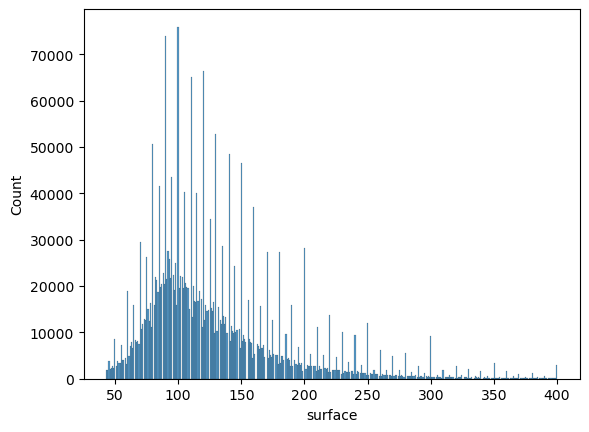

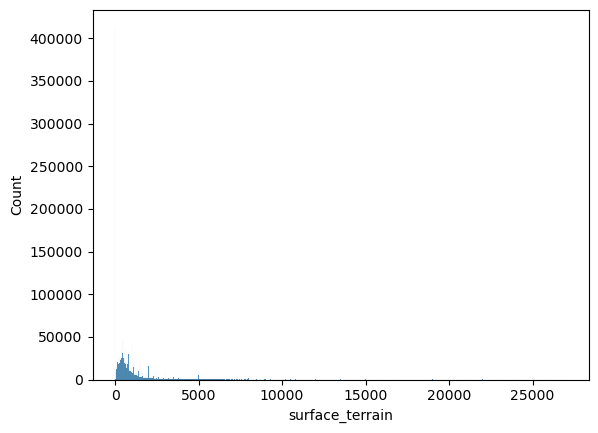

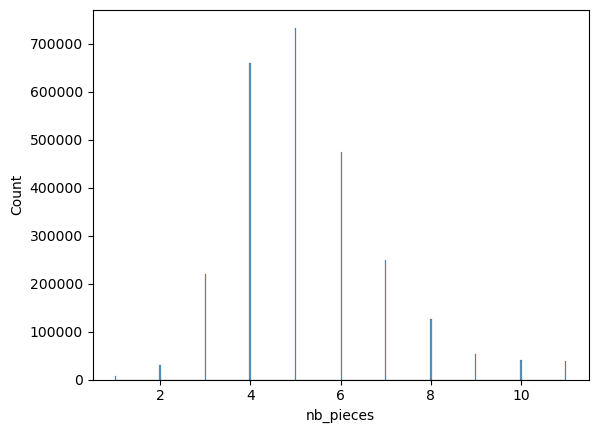

In [76]:
for i in ['surface','surface_terrain','nb_pieces']:
    sns.histplot(data=X[i])
    plt.show()

In [77]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [78]:
X=X.join(pd.get_dummies(df['annonce_exclusive']).iloc[:,1:].set_axis(['excl_oui','excl_non'],axis=1)).drop(columns='annonce_exclusive')
X.head()

,surface,surface_terrain,nb_pieces,bain,annee_construction,nb_toilettes,logement_neuf,CODE_IRIS,REG,DEP,neuf_from_type,chauf-gaz,chauf-elec,chauf-bois,chauf-fioul,chauf-sys-radiateur,chauf-sys-pompe à chaleur,chauf-sys-poêle à bois,has_nord,has_sud,has_est,has_ouest,dpe_enc,ges_enc,excl_oui,excl_non
idannonce,,,,,,,,,,,,,,,,,,,,,,,,,,
entities-1037638-4560933,79,470.00,4,1,1974,1.00,1.00,14510101,84,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False
entities-1037666-4560741,114,450.00,5,1,1974,2.00,1.00,10140000,84,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False
immo-facile-57762298,148,1500.00,7,0,1948,2.00,0.00,14510101,84,1,0,0,0,0,0,0,0,0,0,0,0,0,4,4,False,True
immo-facile-57762759,213,2251.00,8,0,1974,3.00,0.00,14510101,84,1,0,0,0,0,0,0,0,0,0,0,0,0,4,4,False,True
hektor-369_EXPERTIMO22-195047,120,670.00,4,0,1970,1.00,0.00,13600000,84,1,0,0,0,0,1,1,0,0,0,1,0,1,7,7,True,False


In [79]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [80]:
# enc=OneHotEncoder(handle_unknown='ignore',)
# enc.fit(X_train['annonce_exclusive'])
# X_train_encoded=enc.transform(X_train)
# X_test_encoded=enc.transform(X_test)
# X_train_encoded_df = pd.DataFrame(enc.transform(X_train).toarray(), columns=enc.get_feature_names_out(['colonne']))
# X_test_encoded_df = pd.DataFrame(enc.transform(X_test).toarray(), columns=enc.get_feature_names_out(['colonne']))
# X_train_encoded_df.head()

In [81]:
def fun(operator,X_train,X_test):
    #Operator could be scaler or encode
    op=operator
    op.fit(X_train)
    X_train_treted=pd.DataFrame(op.transform(X_train),columns=X_train.columns)
    X_test_treted=pd.DataFrame(op.transform(X_test),columns=X_train.columns)
    return X_train_treted,X_test_treted


In [82]:
X_train_scaled,X_test_scaled=fun(MinMaxScaler(),X_train,X_test)

In [83]:
X_train_scaled.describe()

,surface,surface_terrain,nb_pieces,bain,annee_construction,nb_toilettes,logement_neuf,CODE_IRIS,REG,DEP,neuf_from_type,chauf-gaz,chauf-elec,chauf-bois,chauf-fioul,chauf-sys-radiateur,chauf-sys-pompe à chaleur,chauf-sys-poêle à bois,has_nord,has_sud,has_est,has_ouest,dpe_enc,ges_enc,excl_oui,excl_non
count,2105746.00,2105746.00,2105746.00,2105746.00,2105746.00,2105746.00,2105746.00,2105746.00,2105746.00,2105746.00,2105746.00,2105746.00,2105746.00,2105746.00,2105746.00,2105746.00,2105746.00,2105746.00,2105746.00,2105746.00,2105746.00,2105746.00,2105746.00,2105746.00,2105746.00,2105746.00
mean,0.24,0.04,0.43,0.20,0.88,0.16,0.16,0.52,0.53,0.52,0.03,0.17,0.21,0.02,0.08,0.23,0.02,0.01,0.03,0.16,0.07,0.08,0.45,0.35,0.47,0.34
std,0.16,0.08,0.17,0.24,0.07,0.16,0.36,0.28,0.32,0.28,0.18,0.38,0.40,0.14,0.27,0.42,0.13,0.09,0.16,0.36,0.25,0.27,0.32,0.32,0.50,0.47
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.13,0.01,0.30,0.00,0.90,0.00,0.00,0.31,0.21,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.00,0.00,0.00
50%,0.20,0.02,0.40,0.00,0.90,0.20,0.00,0.51,0.51,0.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.29,0.00,0.00
75%,0.31,0.04,0.50,0.33,0.90,0.20,0.00,0.80,0.79,0.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.71,0.57,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## LazyRegressor

In [104]:
from lazypredict.Supervised import LazyRegressor
from sklearn.linear_model import LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from lazypredict.Supervised import LazyRegressor

from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error

In [101]:


# Initialize the LazyRegressor with the desired regressors
reg = LazyRegressor(
    verbose=0,
    ignore_warnings=False,
    custom_metric=None,
    random_state=24,
    regressors=[
        ('LassoCV', LassoCV()),
        ('ElasticNetCV', ElasticNetCV()),
        ('RandomForestRegressor', RandomForestRegressor()),
        ('LinearSVR', LinearSVR())
    ]
   
)

# Fit the model
models, predictions = reg.fit(X_train_scaled, X_test_scaled, y_train, y_test)


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


  0%|          | 0/4 [00:00<?, ?it/s]

LassoCV model failed to execute
'LassoCV' object is not callable
ElasticNetCV model failed to execute
'ElasticNetCV' object is not callable
RandomForestRegressor model failed to execute
'RandomForestRegressor' object is not callable
LinearSVR model failed to execute
'LinearSVR' object is not callable


In [110]:
import lightgbm as lgb

In [114]:
import time 

# Liste des modèles à tester
models = {
    #'LassoCV': LassoCV(),
    'ElasticNetCV': ElasticNetCV(),
    #'RandomForestRegressor': RandomForestRegressor(),
    'LinearSVR': LinearSVR(),
    'lgb' : lgb.LGBMRegressor(
                            objective='regression',
                            metric='rmse',
                            num_leaves=31,
                            learning_rate=0.05,
                            feature_fraction=0.9,
                        )
}

# Tester chaque modèle avec mesure du temps
results = []
for name, model in models.items():
    print(f"Entraînement de {name}...")
    
    # Mesurer le temps d'entraînement
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    fit_time = time.time() - start_time
    
    # Mesurer le temps de prédiction
    start_time = time.time()
    y_pred = model.predict(X_test_scaled)
    predict_time = time.time() - start_time
    
    # Calculer les métriques
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'RMSE': rmse,
        'R²': r2,
        'Fit_Time': f"{fit_time:.4f}s",
        'Predict_Time': f"{predict_time:.4f}s",
        'Total_Time': f"{fit_time + predict_time:.4f}s"
    })

# Afficher les résultats
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('RMSE')
print(results_df)


Entraînement de ElasticNetCV...
Entraînement de LinearSVR...
Entraînement de lgb...
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.140799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1043
[LightGBM] [Info] Number of data points in the train set: 2105746, number of used features: 26
[LightGBM] [Info] Start training from score 342402.929923
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
          Model      RMSE   R²  Fit_Time Predict_Ti

## annuler encodage pour tester avec lgb

In [115]:
df

,surface,surface_terrain,nb_pieces,prix_bien,bain,dpeL,mapCoordonneesLatitude,mapCoordonneesLongitude,annonce_exclusive,ges_class,annee_construction,nb_toilettes,logement_neuf,CODE_IRIS,REG,DEP,prix_m2_vente,neuf_from_type,chauf-gaz,chauf-elec,chauf-bois,chauf-fioul,chauf-sys-radiateur,chauf-sys-pompe à chaleur,chauf-sys-poêle à bois,has_nord,has_sud,has_est,has_ouest,dpe_enc,ges_enc
idannonce,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
entities-1037638-4560933,79,470.00,4,241000,1,Unknown,46.25,5.23,0,Unknown,1974,1.00,1.00,14510101,84,1,3050.63,0,0,0,0,0,0,0,0,0,0,0,0,0,0
entities-1037666-4560741,114,450.00,5,260900,1,Unknown,46.29,5.67,0,Unknown,1974,2.00,1.00,10140000,84,1,2288.60,0,0,0,0,0,0,0,0,0,0,0,0,0,0
immo-facile-57762298,148,1500.00,7,286000,0,D,46.26,5.23,Oui,D,1948,2.00,0.00,14510101,84,1,1932.43,0,0,0,0,0,0,0,0,0,0,0,0,4,4
immo-facile-57762759,213,2251.00,8,435000,0,D,46.26,5.23,Oui,D,1974,3.00,0.00,14510101,84,1,2042.25,0,0,0,0,0,0,0,0,0,0,0,0,4,4
hektor-369_EXPERTIMO22-195047,120,670.00,4,497000,0,G,46.21,5.96,Non,G,1970,1.00,0.00,13600000,84,1,4141.67,0,0,0,0,1,1,0,0,0,1,0,1,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124739405,88,0.00,4,275000,1,A,43.76,5.49,0,Unknown,1974,1.00,0.00,841210000,93,84,3125.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0
143446525,105,0.00,4,160000,1,F,44.31,4.95,0,Unknown,1974,2.00,0.00,841500000,93,84,1523.81,0,0,0,0,0,0,0,0,0,0,0,0,6,0
143637437,110,0.00,5,219300,1,Unknown,43.95,4.84,0,Unknown,1974,2.00,0.00,840070115,93,84,1993.64,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [128]:
X_train

,surface,surface_terrain,nb_pieces,bain,annee_construction,nb_toilettes,logement_neuf,CODE_IRIS,REG,DEP,neuf_from_type,chauf-gaz,chauf-elec,chauf-bois,chauf-fioul,chauf-sys-radiateur,chauf-sys-pompe à chaleur,chauf-sys-poêle à bois,has_nord,has_sud,has_est,has_ouest,dpe_enc,ges_enc,excl_oui,excl_non
idannonce,,,,,,,,,,,,,,,,,,,,,,,,,,
orpi-1-102040E2X719,215,1478.00,8,1,1930,3.00,0.00,642840103,75,64,0,0,0,0,0,0,0,0,0,1,0,0,2,4,False,True
immo-facile-35456066,180,1218.00,6,1,1974,3.00,0.00,282250000,24,28,0,0,0,0,0,1,0,0,0,0,0,0,7,7,True,False
ag333747-382029004,164,8000.00,8,0,1974,2.00,0.00,540540000,44,54,0,0,0,0,0,0,1,0,0,0,1,0,0,0,False,True
iad-france-1382574,155,1530.00,6,0,1974,2.00,0.00,682940000,44,68,0,0,0,0,1,0,0,0,0,0,0,0,4,5,True,False
iad-france-1074516,200,2400.00,7,0,1900,3.00,0.00,851760000,52,85,0,0,0,0,1,1,0,0,0,0,0,0,4,5,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
era-570294,84,323.00,4,0,1974,1.00,0.00,41160000,93,4,0,0,0,0,0,0,0,0,0,0,0,0,7,7,False,True
immo-facile-56344553,98,341.00,5,1,1975,1.00,0.00,605370000,32,60,0,1,0,0,0,1,0,0,1,1,0,0,5,5,True,False
pericles-34939649,120,298.00,6,0,1930,2.00,0.00,786400108,11,78,0,1,0,0,0,1,0,0,0,0,0,0,4,5,True,False


In [129]:
print(f"Entraînement de {name}...")

# Mesurer le temps d'entraînement
start_time = time.time()
model.fit(X_train, y_train)
fit_time = time.time() - start_time

# Mesurer le temps de prédiction
start_time = time.time()
y_pred = model.predict(X_test)
predict_time = time.time() - start_time

# Calculer les métriques
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

results.append({
    'Model': name,
    'RMSE': rmse,
    'R²': r2,
    'Fit_Time': f"{fit_time:.4f}s",
    'Predict_Time': f"{predict_time:.4f}s",
    'Total_Time': f"{fit_time + predict_time:.4f}s"
})

# Afficher les résultats
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('RMSE')
print(results_df)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

Entraînement de lgb...
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.131823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1047
[LightGBM] [Info] Number of data points in the train set: 2105746, number of used features: 26
[LightGBM] [Info] Start training from score 342402.929923
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
          Model      RMSE   R²  Fit_Time Predict_Time Total_Time
2           lgb 149588.85 0.61   7.3790s      0